# Imports and Initialisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/NREGAImpactAssessment

/content/drive/MyDrive/Colab Notebooks/NREGAImpactAssessment


In [1]:
!pip3 install geojson
!pip3 install geemap==0.20.7
!pip3 install rasterio
!pip3 install tornado==5.1.0
!pip install ipyleaflet==0.16
!pip3 install psmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import ee, geemap
import geemap.colormaps as cm
import rasterio
from rasterio.plot import show
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=6U7wZqOFolRa-Iv9ghckmy6FZlb8jwPpbdTjgRn5I_4&tc=mlJLP_yS1NiyqgsZwoePAvYPZJXj6CjhCVJJ3cnCYHk&cc=pVfXY2IG1lnhX951qqq-YYWVEA77snWAeMO86qXgy9Y

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXm4euZRTE7tGe830EfRvOfbx3iE0UBGvz-1Iryo2mSNyRgLIKwnMW8

Successfully saved authorization token.


In [3]:
import os
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import statsmodels.formula.api as smf
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

# Parameters

In [ ]:
aoi_aer_regcode = 13
aoi_state = 'Bihar'
aoi_district = 'Jamui'

work_type = 'Farm Pond'
work_year = '2017'

seasonality = None
no_sampling = 500

confounding_vars = ['elevation',
                    'slope',
                    # 'drainage_density',
                    'dist_closest_crop',
                    'dist_closest_river',
                    'flow_accumulation',
                    'dist_closest_lin',
                    'dist_closest_road',
                    'recent_cropping_intensity',
                    'dist_closest_upstream_forest',
                    'proximity_water'
                    ]


In [ ]:
buffer_size = 500
dem_resolution = 30
dw_resolution = 10

In [ ]:
cropping_year_start = '07-01'
cropping_year_end = '06-30'
kharif = {'start': '07-01', 'end': '10-31'}
rabi = {'start': '11-01', 'end': '02-30'}
zaid = {'start': '03-01', 'end': '06-30'}
cropping_seasons = [kharif, rabi, zaid]
ndwi_viz = {'min': 0, 'max': 5000, 'palette': ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe',
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']}
lulc_viz = {
  'min': 0,
  'max': 8,
  'palette': [
    '#419BDF', '#397D49', '#88B053', '#7A87C6', '#E49635', '#DFC35A',
    '#C4281B', '#A59B8F', '#B39FE1'
  ]
}
visParams = {
  'min': 0,
  'max': 12,
  'palette': [
    '#000000', # background ----------- black
    '#82CD47', # greenery ------- light green
    '#419BDF', # water ---- blue
    '#C4281B', # Built-up ------ red
    '#8B7E74', # Barren land ------ gray
    '#FFC300', # cropland ------ yellow
    '#285430', # forest ----------- green
    '#B20600', # plantation -------- pink
    '#FFFFFF', # blank
    '#52EE09', # single K
    '#D4791E', # single NK
    '#E51F8F', # double
    '#1A5276'  # triple
    #//'#CAFC0F'//'#1A5276'  // triple

  ]
};

In [ ]:
def getDwLayer(work_year, aoi_boundary):
  interval = (str(int(work_year)-1)+'-'+cropping_year_start, str(int(work_year))+'-'+cropping_year_end)
  DynamicWorld_dataset = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterDate(interval[0], interval[1]).filterBounds(aoi_boundary).mode().clip(aoi_boundary)
  dwComposite = DynamicWorld_dataset.select('label')

  return dwComposite

In [ ]:
# Administrative boundary locations
india_district_boundaries_gee = "users/mtpictd/india_district_boundaires"
india_block_boundaries_gee = "users/mtpictd/block_shapefiles/" #not available pan India, conversion of json to shp reqd. NOT needed at AER level
agro_eco_regions_gee = "users/mtpictd/agro_eco_regions"
# Covariate layer locations
drainage_density_file = "users/mtpictd/Jamui_drainage_density" #not available pan India
lineament_file = "projects/ee-harshita-om/assets/india_lineaments"
flow_accumulation_file = "users/mtpictd/flow_acc_india"
india_roads_file = "users/mtpictd/india_roads_gfbk"
india_rivers_file = "users/mtpictd/india_rivers"

In [ ]:
agro_eco_region = ee.FeatureCollection(agro_eco_regions_gee).filter(ee.Filter.eq('ae_regcode', aoi_aer_regcode))
agro_eco_region

In [ ]:
aoi_boundary = agro_eco_region
aoi_boundary_geometry = agro_eco_region.geometry()
dwComposite = getDwLayer(work_year, aoi_boundary_geometry)


# Covariate computation methods



In [ ]:
def calc_elevation(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  SRTM_dataset = ee.Image("USGS/SRTMGL1_003")
  elevation = SRTM_dataset.select('elevation').clip(aoi_boundary)
  data_points_bfd = data_points.map(lambda f: f.buffer(100))
  elev_coords=elevation.reduceRegions(data_points_bfd, ee.Reducer.mean().setOutputs(["elevation"]), scale=dem_resolution)
  return elev_coords

In [ ]:
def calc_slope(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  SRTM_dataset = ee.Image("USGS/SRTMGL1_003")
  elevation = SRTM_dataset.select('elevation').clip(aoi_boundary)
  slope = ee.Terrain.slope(elevation).clip(aoi_boundary)
  data_points_bfd = data_points.map(lambda f: f.buffer(100))
  slope_coords=slope.reduceRegions(data_points_bfd, ee.Reducer.mean().setOutputs(["slope"]), scale=dem_resolution)
  return slope_coords

In [ ]:
def calc_drainage_density(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  drainage_density = ee.Image(drainage_density_file).clip(aoi_boundary)
  dd_coords=drainage_density.reduceRegions(data_points, ee.Reducer.first().setOutputs(["drainage_density"]), scale=dem_resolution)
  return dd_coords

In [ ]:
def calc_recent_cropping_intensity(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  cropping_intensity = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
  cropping_intensity = cropping_intensity.remap([9,10,11,12], [1,1,2,3], 0)
  cropping_intensity = cropping_intensity.selfMask()
  data_points_bfd = data_points.map(lambda f: f.buffer(100))
  cs_coords=cropping_intensity.reduceRegions(data_points_bfd, ee.Reducer.mode().setOutputs(["recent_cropping_intensity"]), scale=dem_resolution)
  return cs_coords

In [ ]:
def calc_dist_closest_crop(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  filtered_crop = dwComposite.eq(4).selfMask()  # Getting crop layer
  distance = filtered_crop.fastDistanceTransform().sqrt().multiply(ee.Image.pixelArea().sqrt()).rename("distance")  # Distance of each pixel to non-zero valued pixel in image
  coords_distToNearestCrop=distance.reduceRegions(data_points, ee.Reducer.first().setOutputs(["dist_closest_crop"]), scale=dw_resolution)
  return coords_distToNearestCrop

In [ ]:
def calc_flow_accumulation(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  flow_acc = ee.Image(flow_accumulation_file).clip(aoi_boundary)
  fa_coords=flow_acc.reduceRegions(data_points, ee.Reducer.first().setOutputs(["flow_accumulation"]), scale=dem_resolution)
  return fa_coords

In [ ]:
def calc_dist_closest_lin(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  lin_layer = ee.Image(lineament_file).clip(aoi_boundary)
  distance = lin_layer.fastDistanceTransform().sqrt().multiply(ee.Image.pixelArea().sqrt()).rename("distance")
  coords_distToNearestLin=distance.reduceRegions(data_points, ee.Reducer.first().setOutputs(["dist_closest_lin"]), scale=dem_resolution)
  return coords_distToNearestLin

In [ ]:
def calc_dist_closest_road(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  road_layer = ee.FeatureCollection(india_roads_file).filterBounds(aoi_boundary)
  distance = road_layer.distance().rename("distance")
  coords_distToNearestRoad=distance.reduceRegions(data_points, ee.Reducer.first().setOutputs(["dist_closest_road"]), scale=dem_resolution)
  return coords_distToNearestRoad

In [ ]:
def calc_dist_closest_river(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  river_layer = ee.FeatureCollection(india_rivers_file).filterBounds(aoi_boundary)
  distance = river_layer.distance().rename("distance")
  coords_distToNearestRiver=distance.reduceRegions(data_points, ee.Reducer.first().setOutputs(["dist_closest_river"]), scale=dem_resolution)
  return coords_distToNearestRiver

In [ ]:
def calc_dist_closest_upstream_forest(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  filtered_forest = dwComposite.eq(1).selfMask()
  SRTM_dataset = ee.Image("USGS/SRTMGL1_003")
  elevation = SRTM_dataset.select('elevation').clip(aoi_boundary)
  data_points_bfd = data_points.map(lambda f: f.buffer(100))
  elev_coords=elevation.reduceRegions(data_points_bfd, ee.Reducer.mean().setOutputs(["elevation"]), scale=dem_resolution)

  def setDistCForest(f):
    elev_f = ee.Number(f.get('elevation')).toFloat()
    filtered_elevation = elevation.updateMask(elevation.gt(elev_f))
    upstream_forest = (filtered_forest.mask(filtered_elevation)).selfMask()
    distance_upstreamforest = upstream_forest.fastDistanceTransform().sqrt().multiply(ee.Image.pixelArea().sqrt()).rename("distance")
    distCUForest = distance_upstreamforest.reduceRegions(ee.FeatureCollection(f), ee.Reducer.first().setOutputs(["dist_closest_upstream_forest"]), scale=dw_resolution)
    return distCUForest

  distCUForest_fc = elev_coords.map(lambda f: setDistCForest(f)) #10K points 10K feature c ka feature c
  flattened_distCUForest_fc = distCUForest_fc.flatten()

  return flattened_distCUForest_fc

In [ ]:
def calc_proximity_water(data_points, aoi_boundary, dwComposite, waterworks_aoi):
  filtered_water = dwComposite.eq(0).selfMask()  # Getting water layer

  def sumListElements(cur, prev):
    prevVal = ee.Number(ee.List(prev).get(-1))
    curVal = prevVal.add(cur)
    return ee.List(prev).add(curVal)

  buffer_ranges = [100,200,400,800,1600]
  weights = []
  for b in buffer_ranges:
    weights.append(1/(b**2))
  sum_weights = [0]
  sum_weights = ee.List(ee.List(weights).iterate(sumListElements, sum_weights)).get(-1)

  def setProximityWater(f):
    weighted_water_pixels = [0]
    for i, buffer in enumerate(buffer_ranges):
      buffer_geom = ee.FeatureCollection(f.buffer(buffer)).geometry()
      if i>0:
        buffer_geom = buffer_geom.difference(ee.FeatureCollection(f.buffer(buffer_ranges[i-1])).geometry())
        water_mask_buffer = filtered_water.reduceToVectors(geometry=buffer_geom, crs=filtered_water.projection(), scale=dw_resolution)
        count_water_pixels = water_mask_buffer.aggregate_array('count')
        sum_water_pixels = [0]
        sum_water_pixels = ee.List(count_water_pixels.iterate(sumListElements, sum_water_pixels))
        water_pixels_buffer = sum_water_pixels.get(-1)
        wtd_water_pixels_buffer = ee.Number(water_pixels_buffer).multiply(weights[i])
        weighted_water_pixels = ee.List(weighted_water_pixels).add(wtd_water_pixels_buffer)
    proximity_water_f = [0]
    proximity_water_f = ee.Number(ee.List(weighted_water_pixels.iterate(sumListElements, proximity_water_f)).get(-1)).divide(sum_weights)
    return f.set({
        'proximity_water': proximity_water_f
    })

  proximityWater = data_points.map(lambda f: setProximityWater(f))

  return proximityWater

# Segregate water works

In [ ]:
## Hard coded according to AER 13, change when AER is changed ##
districts_oi = pd.read_csv('./AES_data_regcode13/districts.csv')
mapping = districts_oi[['Idb_state','Idb_district']]
aoi_assets = pd.DataFrame()
missing_dists = pd.DataFrame(columns=['Idb_state','Idb_district'])
for i in mapping.index:
  try:
    data = pd.read_csv('/content/drive/My Drive/ICTD_Datasets/NREGA data/NREGA geotagged assets metadata [csv]/'+mapping['Idb_state'][i].upper()+'/'+mapping['Idb_district'][i].upper()+'.csv')
    aoi_assets = pd.concat([aoi_assets, data], axis=0)
  except:
    missing_dists = pd.concat([missing_dists,
                              pd.DataFrame.from_records([(mapping['Idb_state'][i], mapping['Idb_district'][i])], columns=['State', 'Idb_district'])],
                              ignore_index = True)


In [ ]:
aoi_assets

Asset ID                                         Asset Name  \
0        5000140959  Ward no, 1 me karim ke ghar se jibrail ke ghar...   
1        5000140993  Ward no, 2 metaiyab ke ghar se leker fatah ala...   
2        5000141024  Ward no, 3 me deena shah ke ghar se domike man...   
3        5000155800        shri yadav ke ghar se visho baba asthan tak   
4        5000155826           prathmic vidyalay pathan tola parisar me   
...             ...                                                ...   
126057  31003989543                                        krishi work   
126058  31011220550                                Pradhan mantri awas   
126059  31011475980                                Pradhan mantri awas   
126060  31012382520                                  talab khudai work   
126061  31012382522                                  talab khudai work   

                        Work Code  \
0          0527001011/RC/20171212   
1          0527001011/RC/20171213   
2          0527001011/RC/20171215   
3          0527001011/DP/20207045   
4                0527001011/DP/22   
...                           ...   
126057      3153004069/IC/7667255   
126058  3153004069/IF/IAY/1338142   
126059  3153004069/IF/IAY/1132494   
126060   3153004069/WC/9454352830   
126061   3153004069/WC/9454357426   

                                                Work Name  \
0       वार्ड नं0 01 में करीम के घर से जीबरईल के घर तक...   
1       वार्ड नं0 02 में तैयब के घर से लेकर फतह आलम के...   
2       वार्ड नं0 03 में दीना साह के घर से डोमी मंडल क...   
3       shri yadav ke ghar se visho baba asthan tak vr...   
4       प्राथमिक विद्यालय पठान टोला परिसर में ब्रक्षार...   
...                                                   ...   
126057  ग्राम पंचायत विक्रमजोत मे समतलीकरण व्‍यक्तिगत ...   
126058  Construction of IAY House -IAY REG. NO. UP4165833   
126059  Construction of IAY House -IAY REG. NO. UP3130095   
126060      RADHAEYSHYAM KI GHAR KE PAS TALAB KHUDAI WORK   
126061         PRIDEEP KE GHAR KE PICHHE TALAB KUDAI WORK   

                                            Work Type  Estimated Cost  \
0                                          Sand Moram         -1.0000   
1                                          Sand Moram         -1.0000   
2                                          Sand Moram         -1.0000   
3                                          Plantation          1.0000   
4                                       Afforestation          2.4050   
...                                               ...             ...   
126057  Construction of Canal, Distributary and Minor          1.1000   
126058                                     IAY Houses          0.1575   
126059                                     IAY Houses          0.1575   
126060                                    Sunken Pond          2.9300   
126061                                    Sunken Pond          1.0900   

        Start Location End Location  Unskilled  Semi-Skilled  Skilled  \
0                 -1.0           -1       -1.0          -1.0     -1.0   
1                 -1.0           -1       -1.0          -1.0     -1.0   
2                 -1.0           -1       -1.0          -1.0     -1.0   
3                 -1.0           -1      177.0           0.0      0.0   
4                 -1.0           -1    11760.0           0.0      0.0   
...                ...          ...        ...           ...      ...   
126057            -1.0           -1    21000.0           0.0      0.0   
126058            -1.0           -1    15925.0           0.0      0.0   
126059            -1.0           -1    15750.0           0.0      0.0   
126060            -1.0           -1    12600.0           0.0      0.0   
126061            -1.0           -1    32025.0           0.0      0.0   

        Material  Contingency  Total_Expenditure  Unskilled_Persondays  \
0           -1.0           -1               -1.0                    -1   
1           -1.0           -1             

In [ ]:
missing_dists

Empty DataFrame
Columns: [Idb_state, Idb_district]
Index: []

In [ ]:
waterWorks = ['bund',
              'dam',
              'plug',
              'tank',
              'farm pond',
              'harvesting pond',
              'stabilization pond',
              'spur',
              'bench',
              'trench',
              'dyke',
              'embank',
              'canal',
              'drain',
              'well',
              'soak',
              'pit'
              ]

spcl_waterWorks = {'canal':'plantation',
              'drain':'plantation',
              'well':'filter',
              'soak':'pit',
              'pit':'compost'}

In [ ]:
waterWorksList = []
for i in list(aoi_assets['Work Type'].value_counts().keys()):
    for t in waterWorks:
        if t in i.lower():
          if t in spcl_waterWorks.keys() and spcl_waterWorks[t] in i.lower():
            break
          waterWorksList.append(i)
          break
waterWorksList

['Farm Pond',
 'Construction of Canal, Distributary and Minor',
 'Earthen Bunding',
 'Strengthening of Embankment',
 'Water Absorption Trench',
 'Well',
 'Check Dam',
 'Cross Drainage',
 'Cross Bund',
 'Earthen Dam',
 'Lining of Canals',
 'Village Drain',
 'Distributory Canals',
 'Bio Drainage',
 'Community Well for Irrigation',
 'Pebble Bunding',
 'Diversion Drain',
 'Stone Bund',
 'Drainage in Water Logged Areas',
 'Construction of Farm Bunding',
 'Construction of Canal,Distributory and Minor',
 'Construction of Intermediate and Link Drains',
 'Constr of Earthen peripheral Bund for Community',
 'Construction of Storm Water Drains',
 'Mini Percolation tank',
 'Main canal',
 'Earthen Gully Plug',
 'Stop Dam',
 'Constr of Earthen contour Bund for Community',
 'Construction of Earthen graded Bund for Community',
 'Construction of Community Water Harvesting Ponds',
 'Construction of Graded Bund',
 'Repair & Maint of Earthen graded Bund for Com',
 'Peripheral Bunding',
 'Construction of Dr

In [ ]:
# district_boundary = ee.FeatureCollection(india_district_boundaries_gee).filter(ee.Filter.eq('Name', aoi_district))
# district_fc = ee.FeatureCollection(india_block_boundaries_gee+aoi_state.lower()).filter(ee.Filter.eq('district', aoi_district.lower()))
# blocks = district_fc.aggregate_array('subdistric').getInfo()


In [ ]:
aoi_assets

Asset ID                                         Asset Name  \
0        5000140959  Ward no, 1 me karim ke ghar se jibrail ke ghar...   
1        5000140993  Ward no, 2 metaiyab ke ghar se leker fatah ala...   
2        5000141024  Ward no, 3 me deena shah ke ghar se domike man...   
3        5000155800        shri yadav ke ghar se visho baba asthan tak   
4        5000155826           prathmic vidyalay pathan tola parisar me   
...             ...                                                ...   
126057  31003989543                                        krishi work   
126058  31011220550                                Pradhan mantri awas   
126059  31011475980                                Pradhan mantri awas   
126060  31012382520                                  talab khudai work   
126061  31012382522                                  talab khudai work   

                        Work Code  \
0          0527001011/RC/20171212   
1          0527001011/RC/20171213   
2          0527001011/RC/20171215   
3          0527001011/DP/20207045   
4                0527001011/DP/22   
...                           ...   
126057      3153004069/IC/7667255   
126058  3153004069/IF/IAY/1338142   
126059  3153004069/IF/IAY/1132494   
126060   3153004069/WC/9454352830   
126061   3153004069/WC/9454357426   

                                                Work Name  \
0       वार्ड नं0 01 में करीम के घर से जीबरईल के घर तक...   
1       वार्ड नं0 02 में तैयब के घर से लेकर फतह आलम के...   
2       वार्ड नं0 03 में दीना साह के घर से डोमी मंडल क...   
3       shri yadav ke ghar se visho baba asthan tak vr...   
4       प्राथमिक विद्यालय पठान टोला परिसर में ब्रक्षार...   
...                                                   ...   
126057  ग्राम पंचायत विक्रमजोत मे समतलीकरण व्‍यक्तिगत ...   
126058  Construction of IAY House -IAY REG. NO. UP4165833   
126059  Construction of IAY House -IAY REG. NO. UP3130095   
126060      RADHAEYSHYAM KI GHAR KE PAS TALAB KHUDAI WORK   
126061         PRIDEEP KE GHAR KE PICHHE TALAB KUDAI WORK   

                                            Work Type  Estimated Cost  \
0                                          Sand Moram         -1.0000   
1                                          Sand Moram         -1.0000   
2                                          Sand Moram         -1.0000   
3                                          Plantation          1.0000   
4                                       Afforestation          2.4050   
...                                               ...             ...   
126057  Construction of Canal, Distributary and Minor          1.1000   
126058                                     IAY Houses          0.1575   
126059                                     IAY Houses          0.1575   
126060                                    Sunken Pond          2.9300   
126061                                    Sunken Pond          1.0900   

        Start Location End Location  Unskilled  Semi-Skilled  Skilled  \
0                 -1.0           -1       -1.0          -1.0     -1.0   
1                 -1.0           -1       -1.0          -1.0     -1.0   
2                 -1.0           -1       -1.0          -1.0     -1.0   
3                 -1.0           -1      177.0           0.0      0.0   
4                 -1.0           -1    11760.0           0.0      0.0   
...                ...          ...        ...           ...      ...   
126057            -1.0           -1    21000.0           0.0      0.0   
126058            -1.0           -1    15925.0           0.0      0.0   
126059            -1.0           -1    15750.0           0.0      0.0   
126060            -1.0           -1    12600.0           0.0      0.0   
126061            -1.0           -1    32025.0           0.0      0.0   

        Material  Contingency  Total_Expenditure  Unskilled_Persondays  \
0           -1.0           -1               -1.0                    -1   
1           -1.0           -1             

In [ ]:
# aoi_assets_all = aoi_assets.copy()
# aoi_assets_all = aoi_assets_all[aoi_assets_all['Work Type'].notna()]
# aoi_assets_all = aoi_assets_all[aoi_assets_all['Work Type'].str.contains('Farm Pond')]
# aoi_assets_all_ww = aoi_assets_all[aoi_assets_all['Work_start_date'].isin(['0','-1',0,-1]) == True]
# len(aoi_assets_all_ww), len(aoi_assets_all)
# df = aoi_assets_all['District'].value_counts().rename_axis('District').to_frame('Number of farm ponds').reset_index('District').sort_values('District')
# df2 = aoi_assets_all[aoi_assets_all['Work_start_date'].isin(['0','-1',0,-1]) == False]['District'].value_counts().rename_axis('District').to_frame('Number of valid farm ponds').reset_index('District').sort_values('District')
# dfs= pd.merge(df, df2,  how='outer', left_on=['District'], right_on = ['District'])
# dfs['Number of valid farm ponds'] = dfs['Number of valid farm ponds'].fillna(0)
# dfs

In [ ]:
# fig, ax = plt.subplots()

# fruits = ['apple', 'blueberry', 'cherry', 'orange']
# counts = [40, 100, 30, 55]
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(dfs['District'], dfs['Number of farm ponds'], label='Total farm ponds')
# ax.bar(dfs['District'], dfs['Number of valid farm ponds'], label='Farm ponds with valid start date')

# ax.set_ylabel('Number of farm ponds')
# ax.set_title('District v/s Farm ponds distribution')
# ax.legend(title='Fruit color')
# plt.xticks(rotation = 90)
# plt.show()

In [ ]:
# dists = ['SIWAN','SARAN','VAISHALI','SAMASTIPUR','Sheikhpura','SUPAUL','SHEOHAR','SITAMARHI']
# for dist in dists:
#   print(dist,": ",len(aoi_assets[(aoi_assets['District']==dist) & (aoi_assets['Work Type']=='Farm Pond')]))

In [ ]:
aoi_assets_all = aoi_assets.copy()
## Separating water related NRM works ##
aoi_assets_all_ww = aoi_assets_all[aoi_assets_all['Work Type'].isin(waterWorksList)]
# aoi_assets_all_ww.to_csv("./AES_data_regcode13/waterworks.csv")
aoi_assets_all_ww = aoi_assets_all_ww[aoi_assets_all_ww['Work_start_date'].isin(['0','-1',0,-1]) == False]
## Adding work_start_year column using work_start_date column ##
df = aoi_assets_all_ww['Work_start_date']
df = pd.to_datetime(df, format='%d/%m/%Y')
aoi_assets_all_ww.loc[:,'Work_start_year'] = df.dt.year
aoi_assets_all_ww.loc[:,'Work_start_date_dt'] = df
aoi_assets_all_ww = aoi_assets_all_ww[aoi_assets_all_ww['Work_start_date'].notna()]
## aoi_assets_all_ww: all water works, aoi_assets_all: all NREGA assets in all districts in AER ##
len(aoi_assets_all_ww), len(aoi_assets_all)

(204581, 1689899)

In [ ]:
# t = aoi_assets_all[aoi_assets_all['Work Type'].isin(waterWorksList)]
# u = t[t['Work Type'].str.contains('Farm Pond')]
# len(aoi_assets_all_ww[aoi_assets_all_ww['Work Type'].str.contains('Farm Pond')])
# aoi_assets_all_ww['Work_start_year'].value_counts()
# fps = aoi_assets_all_ww[aoi_assets_all_ww['Work Type'].str.contains('Farm Pond')]
# t = fps['Work_start_year'].value_counts().rename_axis('Work start year').to_frame('Number of farm ponds').reset_index('Work start year').sort_values('Work start year')
# t = t[t['Work start year'] > 2005]
# t = t[t['Work start year'] < 2020]
# plt.plot(range(2006,2020), t['Number of farm ponds'], marker='o')
# plt.xlabel("Work start year")
# plt.ylabel("Number of waterworks")
# plt.title("Waterworks distribution across years")
# plt.show()

In [ ]:
# aer_assets_ee = geemap.pandas_to_ee(aoi_assets_all_ww, latitude='lat',longitude='lon').filterBounds(agro_eco_region)

# Generating treated and control groups

In [ ]:
def setProperties(block_fc):
  def iterateOn(f):
    return f.set({
        'block_coords':block_fc.get('subdistric'),
        'district_coords':block_fc.get('district'),
        'state_coords':block_fc.get('state')})
  return iterateOn


In [ ]:
def setLocation(treated_fc):
  def getBlockAssets(block_fc):
    block_assets = treated_fc.filterBounds(block_fc.geometry())
    return block_assets.map(setProperties(block_fc))
  return getBlockAssets


def getTreatedGroup(aoi_boundary, waterworks_aoi, seasonality = -1):
  assets = waterworks_aoi[waterworks_aoi['Work_start_year'] == int(work_year)] # Getting assets built in work_year
  assets = assets[assets['Work Type'].notna()]
  assets = assets[assets['Work Type'].str.contains(work_type)] # Getting assets for relevant work type
  assets = assets[['lat','lon','Asset ID','Asset Name','Panchayat','Block','District','Total_Expenditure']]
  assets = assets.drop_duplicates()
  assets.loc[:, ('Treatment')] = assets.apply(lambda row: 1, axis=1)

  assets_ee = ee.FeatureCollection([])

  if len(assets)>0:
    assets_ee = geemap.pandas_to_ee(assets, latitude='lat',longitude='lon').filterBounds(aoi_boundary) #filtering to remove erroneous data
    cs_coords = calc_recent_cropping_intensity(assets_ee, aoi_boundary, dwComposite, waterworks_aoi)

    if seasonality != -1: ## 1 or 2 or 3 ##
      ## If seasonality is specified, only get treated points where seasonality equals argument ##
      assets_ee = cs_coords.filter(ee.Filter.eq('recent_cropping_intensity', seasonality))
      assets = geemap.ee_to_pandas(assets_ee)

    else: ## 1 + 2 + 3 ##
      assets_ee = cs_coords.filter(ee.Filter.notNull(['recent_cropping_intensity']))
      assets = geemap.ee_to_pandas(assets_ee)

  districts = pd.read_csv('./AES_data_regcode13/districts.csv')
  mapping = districts[['Ibb_state','Ibb_district']]
  treated_fc = ee.FeatureCollection([])
  for i in mapping.index:
    state, district = mapping['Ibb_state'][i], mapping['Ibb_district'][i]
    district_fc = ee.FeatureCollection(
        india_block_boundaries_gee+state.lower()).filter(ee.Filter.eq('district', district.lower()))
    treated_fc = treated_fc.merge(district_fc.map(setLocation(assets_ee)).flatten())

  return assets, treated_fc


In [ ]:
folder_run = 'AEZ13_final_hopefully_ci1'
seasonality = 1
sample_treated, assets_ee = getTreatedGroup(aoi_boundary, aoi_assets_all_ww, seasonality) # assets to analyze

# # ## Exporting dataset for AER ##
fn = "treated_df"
export_task = ee.batch.Export.table.toDrive(collection=assets_ee, folder=folder_run, description = fn+folder_run,
  fileNamePrefix = fn, fileFormat='CSV', selectors=['lat','lon','Asset ID','Asset Name','Block','District','Panchayat','Total_Expenditure','Treatment', 'block_coords','district_coords','state_coords'])
export_task.start()


In [ ]:
treated = pd.read_csv("./AES_data_regcode13/"+folder_run+"/treated_df.csv")
treated = treated.set_index([pd.Index(range(len(treated)))])
treated['idx'] = treated.index
treated = treated.drop_duplicates(subset='Asset ID', keep="first")
treated

lat        lon     Asset ID  \
0     25.229607  87.441458   5001680201   
1     25.229610  87.441423   5001690202   
2     25.178612  87.271605   5001579808   
3     25.278691  87.324577   5001777979   
4     25.221803  87.314381   5001005002   
...         ...        ...          ...   
1149  27.371997  82.333408  31012133352   
1150  27.313842  82.261215  31011724983   
1152  26.925469  82.748384  31010253158   
1153  26.685052  82.853541  31011544893   
1154  26.966426  82.812150  31010836094   

                                             Asset Name              Block  \
0                                          khet pokhari          pirpainti   
1                                          khet pokhari          pirpainti   
2     WC/20230324 ~~~~ भगवती पोखर की खुदाई और सीडी घ...            colgong   
3                             शीतला स्थान पोखर की खुदाई            colgong   
4                            लघरिया पोखर की खुदाई कार्य            colgong   
...                                                 ...                ...   
1149                     KANI GADHI KA SONDRIKARAN WOKR       shriduttganj   
1150                GAIDAHIYA TALAB KA JIRDODHAR WORK (       shriduttganj   
1152                                               work  saltaua gopal pur   
1153                                         9454350499            bankati   
1154                                               WORK  saltaua gopal pur   

       District          Panchayat  Total_Expenditure  Treatment block_coords  \
0     BHAGALPUR           pyalapur           84960.00          1    Pirpainti   
1     BHAGALPUR           pyalapur           93279.00          1    Pirpainti   
2     BHAGALPUR              kurma          676629.94          1    Kahalgaon   
3     BHAGALPUR         mathurapur           46551.00          1    Kahalgaon   
4     BHAGALPUR  sadanandpur baisa           78588.00          1    Kahalgaon   
...         ...                ...                ...        ...          ...   
1149  BALRAMPUR           sahdaiya          112525.00          1      Utraula   
1150  BALRAMPUR         vishrampur          172200.00          1      Utraula   
1152      BASTI   majhauwa khajuri          127575.00          1      Bhanpur   
1153      BASTI            surapar          379925.00          1        Basti   
1154      BASTI          bangariya           66325.00          1     Rudhauli   

     district_coords   state_coords   idx  
0          bhagalpur          bihar     0  
1          bhagalpur          bihar     1  
2          bhagalpur          bihar     2  
3          bhagalpur          bihar     3  
4          bhagalpur          bihar     4  
...              ...            ...   ...  
1149       balrampur  uttar pradesh  1149  
1150       balrampur  uttar pradesh  1150  
1152           basti  uttar pradesh  1152  
1153           basti  uttar pradesh  1153  
1154           basti  uttar pradesh  1154  

[1125 rows x 13 columns]

In [ ]:
treated_blocks = treated[['block_coords','district_coords','state_coords']]
treated_blocks = treated_blocks.value_counts(['block_coords','district_coords','state_coords']).reset_index(name='counts')
treated_blocks['state'] = ['bihar' if s=='bihar' else 'uttar_pradesh' for s in treated_blocks['state_coords']]
treated_blocks

block_coords district_coords   state_coords  counts          state
0         Chakai           jamui          bihar     108          bihar
1           Sono           jamui          bihar      84          bihar
2         Khaira           jamui          bihar      69          bihar
3         Jhajha           jamui          bihar      67          bihar
4     Lakshmipur           jamui          bihar      63          bihar
..           ...             ...            ...     ...            ...
155     Manihari         katihar          bihar       1          bihar
156       Manjha       gopalganj          bihar       1          bihar
157       Munger          munger          bihar       1          bihar
158   Pach Deuri       gopalganj          bihar       1          bihar
159     jamunaha       shrawasti  uttar pradesh       1  uttar_pradesh

[160 rows x 5 columns]

In [ ]:
def addPropertiesControls(f):
  coords = f.geometry().coordinates()
  return f.set({
      'Treatment': 0,
      'lat': coords.get(-1),
      'lon': coords.get(0)
      })

def getAssetMask(aoi_boundary, waterworks_aoi):
  ## Buffering around every NREGA water asset built to mask for control points ##
  # assets_all = waterworks_aoi
  # assets_all = assets_all[['lat','lon','Asset ID']]
  # assets_all_ee = geemap.pandas_to_ee(assets_all, latitude='lat', longitude='lon').filterBounds(aoi_boundary)

  # buffered = assets_all_ee.map(lambda f: f.buffer(buffer_size))

  ## Too many assets in assets_all, so currently hard coded such assets for aer 13 ##
  buffered = ee.FeatureCollection("users/mtpictd/aer_regcode13/waterworks_bfd500_aer13")

  aoi_bg = ee.Image(1).clip(aoi_boundary)
  buffers = ee.Image(1).clip(aoi_boundary).clipToCollection(buffered)
  masked_buffers = aoi_bg.updateMask(buffers.unmask(0).Not())

  return masked_buffers

def getControlGroup(dwComposite, aoi_boundary, waterworks_aoi, treated_blocks, seasonality = -1):
  asset_masked_aoi = getAssetMask(aoi_boundary, waterworks_aoi)
  composite_mask = asset_masked_aoi
  # filtered = dwComposite.lt(6).And(dwComposite.gt(0)).Or(dwComposite.eq(7)).selfMask().clip(aoi_boundary) # Filtering out water, built up, snow_and_ice layers
  # composite_mask = filtered.updateMask(asset_masked_aoi)
  # level2mask = composite_mask

  ci = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
  ci = ci.remap([9,10,11,12], [1,1,2,3], 0)
  ci = ci.selfMask()
  ci_reduced = ci.reduceNeighborhood(reducer=ee.Reducer.mode(), kernel=ee.Kernel.circle(radius=100, units='meters'))

  if seasonality != -1:
    ci_seasonality = ci_reduced.eq(seasonality).selfMask()
    composite_mask = composite_mask.updateMask(ci_seasonality)

  else: ## Get control points from only croplands ##
    composite_mask = composite_mask.updateMask(ci_reduced)

  control_points_ee = ee.FeatureCollection([])
  for i in treated_blocks.index:
    state, block, count = treated_blocks['state'][i], treated_blocks['block_coords'][i], int(treated_blocks['counts'][i])
    block_fc = ee.FeatureCollection(
        india_block_boundaries_gee+state.lower()).filter(ee.Filter.eq('subdistric', block))
    block_pts = composite_mask.stratifiedSample(region=block_fc.geometry(), numPoints=max(3*count,20), scale=dem_resolution, projection=dwComposite.projection(), geometries=True)
    block_pts = block_pts.map(setProperties(block_fc.first()))
    control_points_ee = control_points_ee.merge(block_pts)

  ## SAMPLE ON WHOLE AER ##
  # control_points_ee = composite_mask.stratifiedSample(region=aoi_boundary.geometry(), numPoints=no_sampling, scale=dem_resolution, projection=dwComposite.projection(), geometries=True)

  return control_points_ee, composite_mask

In [ ]:
folder_run = 'AEZ13_final_hopefully_ci1'
seasonality = 1
control_points_ee, composite_mask = getControlGroup(dwComposite, aoi_boundary, aoi_assets_all_ww, treated_blocks, seasonality)
control_points_ee = control_points_ee.map(addPropertiesControls)
assets_ee = geemap.pandas_to_ee(treated, latitude='lat', longitude='lon')
treated_and_control = assets_ee.merge(control_points_ee)
fn = "treated_and_control_df"
export_task = ee.batch.Export.table.toDrive(collection=treated_and_control, folder=folder_run, description = fn+folder_run,
  fileNamePrefix = fn, fileFormat='CSV', selectors=['lat','lon','Asset ID','Asset Name','Block','District','Panchayat','Total_Expenditure','Treatment', 'block_coords','district_coords','state_coords'])
export_task.start()

In [ ]:
treated_and_control = pd.read_csv("./AES_data_regcode13/"+folder_run+"/treated_and_control_df.csv")
treated_and_control

lat        lon      Asset ID  \
0      25.478205  87.090751  5.001344e+09   
1      25.248979  87.479772  5.003541e+09   
2      25.229607  87.441458  5.001680e+09   
3      25.229610  87.441423  5.001690e+09   
4      25.245073  87.451496  5.003566e+09   
...          ...        ...           ...   
13239  25.419673  87.683701           NaN   
13240  25.401616  87.535479           NaN   
13241  25.357419  87.614441           NaN   
13242  25.432608  87.620370           NaN   
13243  25.413474  87.678581           NaN   

                                              Asset Name       Block  \
0                                                   pond  naugachhia   
1                   किर्निया में लेधा बांध पोखर की खुदाई   pirpainti   
2                                           khet pokhari   pirpainti   
3                                           khet pokhari   pirpainti   
4      उपेन्द्र सिंह के खेत से शशिभूषण सिंह के खेत तक...   pirpainti   
...                                                  ...         ...   
13239                                                NaN         NaN   
13240                                                NaN         NaN   
13241                                                NaN         NaN   
13242                                                NaN         NaN   
13243                                                NaN         NaN   

        District  Panchayat  Total_Expenditure  Treatment block_coords  \
0      BHAGALPUR  dholbajja           330096.0          1   Naugachhia   
1      BHAGALPUR  kirtainia           790128.0          1    Pirpainti   
2      BHAGALPUR   pyalapur            84960.0          1    Pirpainti   
3      BHAGALPUR   pyalapur            93279.0          1    Pirpainti   
4      BHAGALPUR    rajgaon           485688.0          1    Pirpainti   
...          ...        ...                ...        ...          ...   
13239        NaN        NaN                NaN          0     Manihari   
13240        NaN        NaN                NaN          0     Manihari   
13241        NaN        NaN                NaN          0     Manihari   
13242        NaN        NaN                NaN          0     Manihari   
13243        NaN        NaN                NaN          0     Manihari   

      district_coords state_coords  
0           bhagalpur        bihar  
1           bhagalpur        bihar  
2           bhagalpur        bihar  
3           bhagalpur        bihar  
4           bhagalpur        bihar  
...               ...          ...  
13239         katihar        bihar  
13240         katihar        bihar  
13241         katihar        bihar  
13242         katihar        bihar  
13243         katihar        bihar  

[13244 rows x 12 columns]

In [ ]:
treated_and_control

In [ ]:
treated_and_control[treated_and_control['Treatment']==0]

lat        lon  Asset ID Asset Name Block District Panchayat  \
2945   27.113176  82.775397       NaN        NaN   NaN      NaN       NaN   
2946   27.173813  82.985872       NaN        NaN   NaN      NaN       NaN   
2947   27.112637  82.763269       NaN        NaN   NaN      NaN       NaN   
2948   27.149828  82.884542       NaN        NaN   NaN      NaN       NaN   
2949   27.086227  82.866755       NaN        NaN   NaN      NaN       NaN   
...          ...        ...       ...        ...   ...      ...       ...   
13239  25.419673  87.683701       NaN        NaN   NaN      NaN       NaN   
13240  25.401616  87.535479       NaN        NaN   NaN      NaN       NaN   
13241  25.357419  87.614441       NaN        NaN   NaN      NaN       NaN   
13242  25.432608  87.620370       NaN        NaN   NaN      NaN       NaN   
13243  25.413474  87.678581       NaN        NaN   NaN      NaN       NaN   

       Total_Expenditure  Treatment block_coords district_coords  \
2945                 NaN          0        Bansi  siddharthnagar   
2946                 NaN          0        Bansi  siddharthnagar   
2947                 NaN          0        Bansi  siddharthnagar   
2948                 NaN          0        Bansi  siddharthnagar   
2949                 NaN          0        Bansi  siddharthnagar   
...                  ...        ...          ...             ...   
13239                NaN          0     Manihari         katihar   
13240                NaN          0     Manihari         katihar   
13241                NaN          0     Manihari         katihar   
13242                NaN          0     Manihari         katihar   
13243                NaN          0     Manihari         katihar   

        state_coords  
2945   uttar pradesh  
2946   uttar pradesh  
2947   uttar pradesh  
2948   uttar pradesh  
2949   uttar pradesh  
...              ...  
13239          bihar  
13240          bihar  
13241          bihar  
13242          bihar  
13243          bihar  

[10299 rows x 12 columns]

In [ ]:
ci = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
ci = ci.remap([9,10,11,12], [1,1,2,3], 0)
ci = ci.selfMask()
ci_reduced = ci.reduceNeighborhood(reducer=ee.Reducer.mode(), kernel=ee.Kernel.circle(radius=100, units='meters'))
composite_mask = getAssetMask(aoi_boundary, 0)
composite_mask = composite_mask.updateMask(ci_reduced)


In [ ]:
legend_dict = {
    'Single cropping': '#FFFF00',
    'Double cropping': '#FFA500',
    'Triple cropping': '#FF0000',
}

In [ ]:
Map = geemap.Map()
Map.add_basemap('SATELLITE')
# Map.addLayer(district_fc, {}, 'dist')

# Map.addLayer(ee.FeatureCollection(
#         india_block_boundaries_gee+'uttar_pradesh'.lower()), {}, 'up2')
# Map.add_labels(
#     ee.FeatureCollection(
#         india_block_boundaries_gee+'uttar_pradesh'.lower()),
#     "subdistric",
#     font_size="12pt",
#     font_color="blue",
#     font_family="arial",
#     font_weight="bold",
# )
# Map.addLayer(ee.FeatureCollection(
#         india_block_boundaries_gee+'bihar'.lower()), {}, 'up2')


# Map.addLayer(block_fc, {}, 'block_fc')
Map.addLayer(getAssetMask(aoi_boundary, 0), {}, 'getAssetMask')
Map.addLayer(composite_mask, {}, 'composite_mask')
Map.addLayer(ci_reduced.eq(2).selfMask(), {'color':'black'}, 'ci_reduced')
Map.addLayer(ci_reduced, {'min': 0, 'max': 3, 'palette': ['white', 'yellow', 'orange', 'red']}, 'cropping intensity')
Map.add_legend(legend_title="Cropland Classification", legend_dict=legend_dict)

# Map.addLayer(geemap.pandas_to_ee(treated_and_control[treated_and_control['Treatment']==0][['lat','lon']], latitude='lat', longitude='lon'), {'color':'white'}, 'control')
# Map.addLayer(geemap.pandas_to_ee(treated_and_control[treated_and_control['Treatment']==1][['lat','lon']], latitude='lat', longitude='lon'), {'color':'green'}, 'treated')

Map.addLayerControl()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
sample_treated = geemap.ee_to_pandas(assets_ee)
sample_treated

Exception: ignored

In [ ]:
ci_isat = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
ci = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
ci = ci.remap([9,10,11,12], [1,1,2,3], 0)
ci = ci.selfMask()
ci_reduced = ci.reduceNeighborhood(reducer=ee.Reducer.mode(), kernel=ee.Kernel.circle(radius=100, units='meters'))
asset_masked_aoi = getAssetMask(aoi_boundary, aoi_assets_all_ww)
composite_mask = asset_masked_aoi.updateMask(ci_reduced)


In [ ]:
district_fc = ee.FeatureCollection(india_block_boundaries_gee+'bihar').filterBounds(aoi_boundary)
district_fc

In [ ]:
district_fc

In [ ]:
Map = geemap.Map()
Map.add_basemap('SATELLITE')

# Map.addLayer(ci_isat, visParams, 'cropping intensity original')
# Map.addLayer(ci, {'min': 0, 'max': 3, 'palette': ['white', 'yellow', 'orange', 'red']}, 'cropping intensity remapped')
# Map.addLayer(ci.eq(seasonality).selfMask(), {'min': 0, 'max': 3, 'palette': ['white', 'yellow', 'orange', 'red']}, 'cropping intensity 1')

# Map.addLayer(composite_mask, {}, 'composite_mask')
# Map.addLayer(asset_masked_aoi, {}, 'asset_masked_aoi')
Map.addLayer(aoi_boundary, {}, 'aoi_boundary')
Map.addLayer(assets_ee2, {'color':'red'}, 'assets old')
Map.addLayer(treated_fc, {'color':'white'}, 'assets')

Map.addLayer(ee.FeatureCollection(
        india_block_boundaries_gee+'uttar_pradesh'.lower()), {}, 'up2')
Map.add_labels(
    ee.FeatureCollection(
        india_block_boundaries_gee+'uttar_pradesh'.lower()),
    "subdistric",
    font_size="12pt",
    font_color="blue",
    font_family="arial",
    font_weight="bold",
)

Map.addLayer(ee.FeatureCollection(
        india_block_boundaries_gee+'bihar'.lower()), {}, 'br')
Map.add_labels(
    ee.FeatureCollection(
        india_block_boundaries_gee+'bihar'.lower()),
    "subdistric",
    font_size="12pt",
    font_color="blue",
    font_family="arial",
    font_weight="bold",
)


# dataset = pd.read_csv("./AES_data_regcode13/"+folder_run+"/treated_and_control_df.csv")
# Map.addLayer(geemap.pandas_to_ee(dataset[dataset['Treatment']==1][['lat','lon']],latitude='lat',longitude='lon'), {'color':'white'}, 'treated')
# Map.addLayer(geemap.pandas_to_ee(dataset[dataset['Treatment']==0][['lat','lon']],latitude='lat',longitude='lon'), {'color':'red'}, 'control')

Map.addLayerControl()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
districts = pd.read_csv('./AES_data_regcode13/districts.csv')
districts['state_name'] = ['Bihar' if s=='BR' else 'Uttar_Pradesh' for s in districts['state']]
mapping = districts[['state_name','district']]
mapping

state_name            district
0           Bihar           Bhagalpur
1           Bihar           Darbhanga
2           Bihar           Gopalganj
3           Bihar               Jamui
4           Bihar             Katihar
5           Bihar            Khagaria
6           Bihar          Kishanganj
7           Bihar          Lakhisarai
8           Bihar           Madhepura
9           Bihar           Madhubani
10          Bihar              Munger
11          Bihar         Muzaffarpur
12          Bihar  Pashchim Champaran
13          Bihar     Purbi Champaran
14          Bihar              Purnia
15          Bihar             Saharsa
16          Bihar          Samastipur
17          Bihar               Saran
18          Bihar          Sheikhpura
19          Bihar             Sheohar
20          Bihar           Sitamarhi
21          Bihar               Siwan
22          Bihar              Supaul
23          Bihar            Vaishali
24          Bihar              Araria
25          Bihar               Banka
26          Bihar           Begusarai
27  Uttar_Pradesh              Deoria
28  Uttar_Pradesh               Gonda
29  Uttar_Pradesh           Gorakhpur
30  Uttar_Pradesh         Kushi Nagar
31  Uttar_Pradesh         Maharajganj
32  Uttar_Pradesh   Sant Kabeer Nagar
33  Uttar_Pradesh           Shravasti
34  Uttar_Pradesh     Siddharth Nagar
35  Uttar_Pradesh            Bahraich
36  Uttar_Pradesh           Balrampur
37  Uttar_Pradesh               Basti

In [ ]:
folder_run

'AEZ13_block_non0ci'

In [ ]:
dataset = pd.read_csv("./AES_data_regcode13/"+folder_run+"/treated_and_control_df.csv")
dataset

lat        lon      Asset ID  \
0      25.478205  87.090751  5.001344e+09   
1      25.248979  87.479772  5.003541e+09   
2      25.229607  87.441458  5.001680e+09   
3      25.229610  87.441423  5.001690e+09   
4      25.245073  87.451496  5.003566e+09   
...          ...        ...           ...   
59119  26.976273  82.724732           NaN   
59120  27.037718  82.786176           NaN   
59121  26.948785  82.855167           NaN   
59122  27.030981  82.854359           NaN   
59123  27.011847  82.800190           NaN   

                                              Asset Name       Block  \
0                                                   pond  naugachhia   
1                   किर्निया में लेधा बांध पोखर की खुदाई   pirpainti   
2                                           khet pokhari   pirpainti   
3                                           khet pokhari   pirpainti   
4      उपेन्द्र सिंह के खेत से शशिभूषण सिंह के खेत तक...   pirpainti   
...                                                  ...         ...   
59119                                                NaN         NaN   
59120                                                NaN         NaN   
59121                                                NaN         NaN   
59122                                                NaN         NaN   
59123                                                NaN         NaN   

        District  Panchayat  Total_Expenditure  Treatment  
0      BHAGALPUR  dholbajja           330096.0          1  
1      BHAGALPUR  kirtainia           790128.0          1  
2      BHAGALPUR   pyalapur            84960.0          1  
3      BHAGALPUR   pyalapur            93279.0          1  
4      BHAGALPUR    rajgaon           485688.0          1  
...          ...        ...                ...        ...  
59119        NaN        NaN                NaN          0  
59120        NaN        NaN                NaN          0  
59121        NaN        NaN                NaN          0  
59122        NaN        NaN                NaN          0  
59123        NaN        NaN                NaN          0  

[59124 rows x 9 columns]

# Confounding variables

## Compute covariates for dataset

In [ ]:
folder_run = 'AEZ13_final_hopefully_ci-1'

In [ ]:
def addCovariate(var):
  def setProperty(f):
    return f.set({var:ee.Feature(ee.List(f.get('var')).get(0)).get(var)})
  return setProperty
eqFilter = ee.Filter.intersects(leftField= '.geo', rightField= '.geo')
saveAllJoin = ee.Join.saveAll(matchesKey= 'var')

In [ ]:
## Import dataset ##
dataset = pd.read_csv("./AES_data_regcode13/"+folder_run+"/treated_and_control_df.csv")
dataset = dataset.set_index([pd.Index(range(len(dataset)))])
dataset['idx'] = dataset.index
coords = dataset.loc[:, ('idx','lat','lon','Treatment')]
data_points = geemap.pandas_to_ee(coords, longitude='lon', latitude='lat')


In [ ]:
dataset[dataset['Treatment']==1]

lat        lon      Asset ID  \
0     25.478205  87.090751  5.001344e+09   
1     25.248979  87.479772  5.003541e+09   
2     25.229607  87.441458  5.001680e+09   
3     25.229610  87.441423  5.001690e+09   
4     25.245073  87.451496  5.003566e+09   
...         ...        ...           ...   
2940  27.046126  82.826069  3.101116e+10   
2941  27.038073  82.825677  3.101116e+10   
2942  27.046835  82.738758  3.101212e+10   
2943  26.966426  82.812150  3.101084e+10   
2944  26.962351  82.804436  3.101099e+10   

                                             Asset Name              Block  \
0                                                  pond         naugachhia   
1                  किर्निया में लेधा बांध पोखर की खुदाई          pirpainti   
2                                          khet pokhari          pirpainti   
3                                          khet pokhari          pirpainti   
4     उपेन्द्र सिंह के खेत से शशिभूषण सिंह के खेत तक...          pirpainti   
...                                                 ...                ...   
2940  Construction of IAY House -IAY REG. NO. UP3729591            mithwal   
2941  GP.SADIKALA ME GAW KE PURAB POKHRE KI KHUDAI K...            mithwal   
2942                                      Pokhra Khudai           ramnagar   
2943                                               WORK  saltaua gopal pur   
2944                                         20/02/2018  saltaua gopal pur   

             District  Panchayat  Total_Expenditure  Treatment block_coords  \
0           BHAGALPUR  dholbajja           330096.0          1   Naugachhia   
1           BHAGALPUR  kirtainia           790128.0          1    Pirpainti   
2           BHAGALPUR   pyalapur            84960.0          1    Pirpainti   
3           BHAGALPUR   pyalapur            93279.0          1    Pirpainti   
4           BHAGALPUR    rajgaon           485688.0          1    Pirpainti   
...               ...        ...                ...        ...          ...   
2940  SIDDHARTH NAGAR  sandikala           337925.0          1     Rudhauli   
2941  SIDDHARTH NAGAR  sandikala           353675.0          1     Rudhauli   
2942            BASTI    nakthar           162400.0          1     Rudhauli   
2943            BASTI  bangariya            66325.0          1     Rudhauli   
2944            BASTI  bangariya           186200.0          1     Rudhauli   

     district_coords   state_coords   idx  
0          bhagalpur          bihar     0  
1          bhagalpur          bihar     1  
2          bhagalpur          bihar     2  
3          bhagalpur          bihar     3  
4          bhagalpur          bihar     4  
...              ...            ...   ...  
2940           basti  uttar pradesh  2940  
2941           basti  uttar pradesh  2941  
2942           basti  uttar pradesh  2942  
2943           basti  uttar pradesh  2943  
2944           basti  uttar pradesh  2944  

[2945 rows x 13 columns]

In [ ]:
confounding_vars = ['elevation',
                    'slope',
                    # 'drainage_density',
                    'dist_closest_crop',
                    'dist_closest_river',
                    'flow_accumulation',
                    'dist_closest_lin',
                    'dist_closest_road',
                    'recent_cropping_intensity',
                    'dist_closest_upstream_forest',
                    'proximity_water'
                    ]

In [ ]:
covariates_fc = data_points
# geemap.pandas_to_ee(dataset, longitude='lon', latitude='lat')
for var in confounding_vars:
  print(var)
  func = globals()['calc_'+var]
  var_fc = func(data_points, aoi_boundary, dwComposite, aoi_assets_all_ww)
  covariates_fc = saveAllJoin.apply(covariates_fc, var_fc, eqFilter)
  covariates_fc = covariates_fc.map(addCovariate(var))

elevation
slope
dist_closest_crop
dist_closest_river
flow_accumulation
dist_closest_lin
dist_closest_road
recent_cropping_intensity
dist_closest_upstream_forest
proximity_water


In [ ]:
# Export created dataset with covariates
fn = "covariates"
export_task = ee.batch.Export.table.toDrive(collection=covariates_fc, folder=folder_run, description = fn+folder_run,
  fileNamePrefix = fn, fileFormat='CSV')
export_task.start()

## Validate dataset covariate values [optional]

In [ ]:
treated_and_control_df.columns

Index(['system:index', 'Asset ID', 'Asset Name', 'Block', 'District',
       'Panchayat', 'Total_Expenditure', 'Treatment', 'lat', 'lon', '.geo'],
      dtype='object')

In [ ]:
treated_and_control_df = pd.read_csv("./AES_data_regcode13/AES13_second_run/treated_and_control_df.csv")
covariates = pd.read_csv("./AES_data_regcode13/AES13_second_run/covariates.csv")
treated_and_assetID_df = treated_and_control_df[['Asset Name','Asset ID','Block','District','Panchayat','Total_Expenditure']]
covariates = covariates.set_index('idx')
df = covariates.join(treated_and_assetID_df)
df['idx'] = df.index
dataset = df.copy()
for var in confounding_vars:
  dataset = dataset[dataset[var].notna()]
# dataset = treated_and_control_df[['lat','lon','Treatment']]
dataset

system:index  Treatment  dist_closest_crop  dist_closest_lin  \
idx                                                                  
0                0          1         297.649977       2343.774346   
1                1          1           0.000000       7188.151465   
2                2          1           0.000000       8057.995014   
3                3          1           0.000000       8411.880528   
4                4          1          34.212572      15556.927509   
...            ...        ...                ...               ...   
8471          8471          0          40.184081       4064.160752   
8472          8472          0          48.029445       9016.843971   
8473          8473          0          48.037260          0.000000   
8474          8474          0          26.894038       1508.614962   
8475          8475          0        4659.980836       1079.910715   

      dist_closest_river  dist_closest_road  dist_closest_upstream_forest  \
idx                                                                         
0            1758.055699         128.131464                      9.483920   
1             134.107914         473.361519                    144.877777   
2             954.252981         127.805776                    216.426419   
3            3720.999557          46.302785                    318.959813   
4            7361.762254           3.963319                    150.032110   
...                  ...                ...                           ...   
8471          768.758964         676.610731                      9.471482   
8472           62.232865        2584.453067                      0.000000   
8473        14857.815671         132.054532                     28.262645   
8474         2195.004308        6539.249242                     13.447019   
8475           17.494788        4717.576238                      9.404765   

       elevation  flow_accumulation        lat        lon  proximity_water  \
idx                                                                          
0      38.000000                  5  25.407628  86.946212        36.381232   
1      35.829268                  2  25.215947  87.264654         2.434018   
2      34.138889                756  25.224729  87.271154         2.976540   
3      37.057143                  1  25.178612  87.271605         5.891496   
4      51.636364                  1  25.278691  87.324577         5.164223   
...          ...                ...        ...        ...              ...   
8471   49.000000                  1  25.728922  85.658312        53.193548   
8472   81.975610                  2  27.032103  82.870871         0.158358   
8473   81.000000               2413  26.994711  84.771342        10.882698   
8474  134.428571                  1  24.760233  86.972888         0.894428   
8475  160.868421                  5  27.385001  84.023955         0.000000   

      recent_cropping_intensity      slope          var  \
idx                                                       
0                           0.0   0.927410  [<Feature>]   
1                           0.0   2.664629  [<Feature>]   
2                           0.0   1.225383  [<Feature>]   
3                           3.0   2.239022  [<Feature>]   
4                           0.0   2.215977  [<Feature>]   
...                         ...        ...          ...   
8471                        2.0   2.058242  [<Feature>]   
8472                        1.0   2.963829  [<Feature>]   
8473                        0.0   1.091521  [<Feature>]   
8474                        2.0   3.376708  [<Feature>]   
8475                        0.0  12.929728  [<Feature>]   

                                                   .geo  \
idx                                                       
0     {"type":"Point","coordinates":[86.946212,25.40...   
1     {"type":"Point","coordinates":[87.264654,25.21...   
2     {"type":"Point","coordinates":[87.271154,25.22...   
3     {"type":"

In [ ]:
seasonality = 1
ci = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
ci = ci.remap([9,10,11,12], [1,1,2,3], 0)
ci_seasonality = ci.eq(seasonality).selfMask()

asset_masked_aoi = getAssetMask(aoi_boundary, aoi_assets_all_ww)
filtered = dwComposite.lt(6).And(dwComposite.gt(0)).Or(dwComposite.eq(7)).selfMask().clip(aoi_boundary) # Filtering out water, built up, snow_and_ice layers
composite_mask = filtered.updateMask(asset_masked_aoi)
level2mask = composite_mask
composite_mask = composite_mask.updateMask(ci_seasonality)


In [ ]:
aoi_boundary = ee.FeatureCollection(india_district_boundaries_gee).filter(ee.Filter.eq('Name', 'Jamui'))


In [ ]:
SRTM_dataset = ee.Image("USGS/SRTMGL1_003")
elevation = SRTM_dataset.select('elevation').clip(aoi_boundary)
slope = ee.Terrain.slope(elevation).clip(aoi_boundary)
# drainage_density = ee.Image(drainage_density_file).clip(aoi_boundary)
cropping_intensity = ee.Image("projects/ee-indiasat/assets/LULC_Deliverables_Combined/Temporal_Correction/Eastern_Plain_EcoRegion_LULC_"+str(int(work_year)-1)+"-"+cropping_year_start+"_"+str(int(work_year))+"-"+cropping_year_end).select('class').clip(aoi_boundary)
cropping_intensity = cropping_intensity.remap([9,10,11,12], [1,1,2,3], 0)
# filtered_crop = dwComposite.eq(4).selfMask()  # Getting crop layer
flow_acc = ee.Image(flow_accumulation_file).clip(aoi_boundary)
lin_layer = ee.Image(lineament_file).clip(aoi_boundary)
road_layer = ee.FeatureCollection(india_roads_file).filterBounds(aoi_boundary)
river_layer = ee.FeatureCollection(india_rivers_file).filterBounds(aoi_boundary)
filtered_forest = dwComposite.eq(1).selfMask().clip(aoi_boundary)
filtered_water = dwComposite.eq(0).selfMask().clip(aoi_boundary)  # Getting water layer



In [ ]:
dataset.columns

Index(['system:index', 'Treatment', 'dist_closest_crop', 'dist_closest_lin',
       'dist_closest_river', 'dist_closest_road',
       'dist_closest_upstream_forest', 'elevation', 'flow_accumulation', 'lat',
       'lon', 'proximity_water', 'recent_cropping_intensity', 'slope', 'var',
       '.geo', 'Asset Name', 'Asset ID', 'Block', 'District', 'Panchayat',
       'Total_Expenditure', 'idx'],
      dtype='object')

In [ ]:
Map = geemap.Map()
Map.add_basemap("SATELLITE")
# Map.addLayer(dwComposite, lulc_viz, 'dwComposite')
# Map.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
# Map.addLayer(river_layer, {}, 'filtered_crop')
# Map.addLayer(
#     geemap.pandas_to_ee(dataset[dataset['flow_accumulation']==1][['lat','lon']], latitude='lat',longitude='lon'),
#      {'color':'red'}, 'assets')
# Map.addLayer(
#     geemap.pandas_to_ee(dataset[dataset['flow_accumulation']>10000][['lat','lon']], latitude='lat',longitude='lon'),
#      {'color':'green'}, 'control points')

# Map.addLayer(composite_mask, {}, 'composite_mask')
# Map.addLayer(asset_masked_aoi, {}, 'asset_masked_aoi')
# Map.addLayer(ci, {'min': 0, 'max': 3, 'palette': ['white', 'yellow', 'orange', 'red']}, 'cropping intensity')
# Map.addLayer(level2mask, {}, 'level2mask')

Map.addLayer(aoi_boundary, {}, 'aoi_boundary')

# Map.addLayer(elevation, {}, 'elevation')
# Map.addLayer(slope, {}, 'slope')
Map.addLayer(cropping_intensity, {'min': 0, 'max': 3, 'palette': ['white', 'yellow', 'orange', 'red']}, 'cropping_intensity')
# Map.addLayer(flow_acc, {}, 'flow_acc')
# Map.addLayer(river_layer, {}, 'filtered_crop')
# Map.addLayer(lin_layer, {}, 'lin_layer')
# Map.addLayer(road_layer, {}, 'road_layer')
Map.addLayer(filtered_forest, {}, 'filtered_forest')
Map.addLayer(filtered_water, {}, 'filtered_water')

Map.addLayerControl()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
pd.read_csv("./AES_data_regcode13/"+'AEZ13_final_hopefully_ci-1'+"/matchings_blockLevel.csv")

id        lon        lat  \
0        0  87.090751  25.478205   
1        1  87.479772  25.248979   
2        2  87.441458  25.229607   
3        3  87.441423  25.229610   
4        4  87.451496  25.245073   
...    ...        ...        ...   
2939  2940  82.826069  27.046126   
2940  2941  82.825677  27.038073   
2941  2942  82.738758  27.046835   
2942  2943  82.812150  26.966426   
2943  2944  82.804436  26.962351   

                                             Asset Name      Asset ID  \
0                                                  pond  5.001344e+09   
1                  किर्निया में लेधा बांध पोखर की खुदाई  5.003541e+09   
2                                          khet pokhari  5.001680e+09   
3                                          khet pokhari  5.001690e+09   
4     उपेन्द्र सिंह के खेत से शशिभूषण सिंह के खेत तक...  5.003566e+09   
...                                                 ...           ...   
2939  Construction of IAY House -IAY REG. NO. UP3729591  3.101116e+10   
2940  GP.SADIKALA ME GAW KE PURAB POKHRE KI KHUDAI K...  3.101116e+10   
2941                                      Pokhra Khudai  3.101212e+10   
2942                                               WORK  3.101084e+10   
2943                                         20/02/2018  3.101099e+10   

                  Block         District  Panchayat  Total_Expenditure  \
0            naugachhia        BHAGALPUR  dholbajja           330096.0   
1             pirpainti        BHAGALPUR  kirtainia           790128.0   
2             pirpainti        BHAGALPUR   pyalapur            84960.0   
3             pirpainti        BHAGALPUR   pyalapur            93279.0   
4             pirpainti        BHAGALPUR    rajgaon           485688.0   
...                 ...              ...        ...                ...   
2939            mithwal  SIDDHARTH NAGAR  sandikala           337925.0   
2940            mithwal  SIDDHARTH NAGAR  sandikala           353675.0   
2941           ramnagar            BASTI    nakthar           162400.0   
2942  saltaua gopal pur            BASTI  bangariya            66325.0   
2943  saltaua gopal pur            BASTI  bangariya           186200.0   

     block_coords district_coords   state_coords  elevation     slope  \
0      Naugachhia       bhagalpur          bihar  -1.010031 -0.417275   
1       Pirpainti       bhagalpur          bihar  -0.630727  0.366323   
2       Pirpainti       bhagalpur          bihar  -0.750746 -0.546368   
3       Pirpainti       bhagalpur          bihar  -0.750746 -0.546368   
4       Pirpainti       bhagalpur          bihar  -0.849269  1.198885   
...           ...             ...            ...        ...       ...   
2939     Rudhauli           basti  uttar pradesh  -0.001440  0.473435   
2940     Rudhauli           basti  uttar pradesh   0.017380  1.318208   
2941     Rudhauli           basti  uttar pradesh   0.029596 -0.305945   
2942     Rudhauli           basti  uttar pradesh   0.070514  1.695100   
2943     Rudhauli           basti  uttar pradesh  -0.019354  0.507777   

      dist_closest_river  flow_accumulation  dist_closest_lin  \
0               7.973799           1.386294          8.500365   
1               8.152378           0.693147          7.570601   
2               8.809671           0.693147          8.136227   
3               8.809671           5.937536          8.144463   
4               8.460926           1.386294          8.009289   
...                  ...                ...               ...   
2939            6.604752           0.693147          9.561470   
2940            6.196722           0.693147          9.549771   
2941            8.604440           2.944439          9.583613   
2942            5.142829           0.693147          9.661864   
2943            3.949342           1.098612          9.718783   

      dist_closest_road  recent_cropping_intensity  \
0              1.073977                        3.0   
1              2.298098                    

In [ ]:
df = pd.read_csv("./AES_data_regcode13/"+'AEZ13_final_hopefully_ci-1'+"/matchings_blockLevel.csv")
# df['district'] = [d.lower() for d in df['District']]
# df = df[['lat','lon','district','district_coords']]
# df2 = df.query('district != district_coords')
# df2

In [ ]:
Map = geemap.Map()
Map.addLayer(geemap.pandas_to_ee(df[df['district_coords']=='jamui'][['lat','lon']], latitude='lat', longitude='lon'), {'color':'green'}, 'new')
Map.addLayer(geemap.pandas_to_ee(df[df['District']=='JAMUI'][['lat','lon']], latitude='lat', longitude='lon'), {'color':'red'}, 'ori')
Map.addLayerControl()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

# PSM

## Dataset

Original Dataset with covariates and metadata

In [5]:
pd.read_csv("built.csv")

Unnamed: 0.1  Unnamed: 0          system:index  Treatment        lat  \
0                0          12  00000000000000000016          1  25.103869   
1                1          25  00000000000000000029          1  26.176702   
2                2          26  0000000000000000002a          1  26.076810   
3                3          27  0000000000000000002c          1  26.131438   
4                4          45  00000000000000000040          1  25.936834   
...            ...         ...                   ...        ...        ...   
1711          1711        2062  00000000000000000bdf          0  27.209117   
1712          1712        3391  0000000000000000138f          0  24.927845   
1713          1713        3931  000000000000000016a4          0  27.349523   
1714          1714        5365  00000000000000001ec4          0  27.144168   
1715          1715        3763  000000000000000015a1          0  26.703275   

            lon  dist_closest_lin  dist_closest_river  dist_closest_road  \
0     87.280995         -0.134451            0.848528          -1.469108   
1     86.241882         -0.039732            0.418406          -0.816671   
2     86.079976          0.423802           -0.161008          -0.530568   
3     86.059228          0.401383           -0.222563          -1.394680   
4     85.994986         -0.658939           -0.305348          -1.648261   
...         ...               ...                 ...                ...   
1711  82.979404         -0.595844           -1.149480           0.918168   
1712  86.431630         -0.365539            1.572385           0.261462   
1713  82.838189          0.183107            0.552749           1.330692   
1714  82.471407         -0.034967           -0.053249          -1.186530   
1715  83.679281          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  
0    -0.796380 -1.406058  0.159465  
1     0.304373 -0.309396  1.044892  
2     0.304373 -0.309396  1.044892  
3     0.304373 -0.309396  1.044892  
4     1.353328  1.504017 -0.850520  
...        ...       ...       ...  
1711  0.304

In [ ]:
# pd.read_csv("./AES_data_regcode13/"+folder_run+"/covariates.csv")

system:index  Treatment  dist_closest_crop  dist_closest_lin  \
0                0          1          26.816877       4915.563291   
1                1          1           0.000000       8057.995014   
2                2          1           0.000000       7632.451774   
3                3          1           0.000000       7613.612632   
4                4          1          13.368067       7781.864136   
...            ...        ...                ...               ...   
1237          1237          0           0.000000       4393.720310   
1238          1238          0           0.000000       8296.887894   
1239          1239          0           0.000000       4623.067096   
1240          1240          0           0.000000       8255.652667   
1241          1241          0           0.000000       7852.050547   

      dist_closest_river  dist_closest_road  dist_closest_upstream_forest  \
0            2902.868028           1.926997                      0.000000   
1             954.252981         127.805776                    216.426419   
2             292.559813          62.145336                     50.903372   
3             292.559813          62.145336                     38.973704   
4             168.144840          14.313000                     68.164035   
...                  ...                ...                           ...   
1237          191.936394        2033.840564                     93.060449   
1238          539.243879         344.847241                    105.604486   
1239         2490.218335         252.657310                    154.954263   
1240          379.189178         469.718047                     21.120776   
1241          408.555191         639.830977                      9.445714   

      elevation  flow_accumulation   idx        lat        lon  \
0     36.173682                  3     0  25.478205  87.090751   
1     35.532012                756     1  25.224729  87.271154   
2     56.098957                  1     2  26.210828  85.733635   
3     56.098957                  1     3  26.211008  85.733665   
4     59.059269                  4     4  26.207508  85.734390   
...         ...                ...   ...        ...        ...   
1237  58.354832                  1  1237  26.302806  87.683432   
1238  66.788344                  6  1238  26.385541  87.760238   
1239  61.835435                  1  1239  26.331103  87.626299   
1240  66.242743                  1  1240  26.386889  87.758890   
1241  64.850241                 22  1241  26.381499  87.757004   

      proximity_water  recent_cropping_intensity     slope          var  \
0            6.451613                        3.0  1.653879  [<Feature>]   
1            2.976540                        3.0  1.869043  [<Feature>]   
2           40.108504                        3.0  1.755795  [<Feature>]   
3           40.777126                        3.0  1.755795  [<Feature>]   
4           45.460411                        3.0  2.275310  [<Feature>]   
...               ...                        ...       ...          ...   
1237       101.281525                        3.0  0.958953  [<Feature>]   
1238        48.055718                        3.0  1.192788  [<Feature>]   
1239         3.618768                        3.0  2.196162  [<Feature>]   
1240        75.310850                        3.0  1.274644  [<Feature>]   
1241        74.961877                        3.0  1.514942  [<Feature>]   

                                                   .geo  
0     {"type":"Point","coordinates":[87.090751,25.47...  
1     {"type":"Point","coordinates":[87.271154,25.22...  
2     {"type":"Point","coordinates":[85.733635,26.21...  
3     {"type":"Point","coordinates":[85.733665,26.21...  
4     {"type":"Point","coordinates":[85.73439,26.207...  
...                                                 ...  
1237  {"type":"Point","coordinates":[87.683432,26.30...  
1238  {"type":"Point","coordinates":[87.760238,26.38...  
1239  {"type":"Point","c

In [6]:
# folder_run = "AEZ13_final_hopefully_ci3"
treated_and_control_df = pd.read_csv("built.csv")
covariates = pd.read_csv("built.csv")
metadata = ['Asset Name','Asset ID','Block','District','Panchayat','Total_Expenditure','block_coords','district_coords','state_coords']
# geolabels = ['block_coords','district_coords','state_coords']
treated_and_assetID_df = treated_and_control_df[metadata]
covariates.set_index('idx', inplace=True)
covariates.sort_index(inplace=True)
covariates = covariates[['lat','lon','Treatment']+confounding_vars]
df = covariates.join(treated_and_assetID_df) # to get metadata from original df #
df['id'] = df.index
dataset = df.copy()
for var in confounding_vars:
  dataset = dataset[dataset[var].notna()]
dataset

KeyError: "None of [Index(['Asset Name', 'Asset ID', 'Block', 'District', 'Panchayat',\n       'Total_Expenditure', 'block_coords', 'district_coords', 'state_coords'],\n      dtype='object')] are in the [columns]"

### Normalise dataset

In [7]:
data = dataset.copy()
data = data[['id','lon', 'lat', 'Treatment']+metadata+confounding_vars]
data

NameError: name 'dataset' is not defined

In [8]:
def plot_hist (dist, label):
    mean = dist.mean()
    plt.hist(dist, bins=100, label=label)
    plt.axvline(mean, color='k', linestyle='dashed', label='Mean = '+str(mean))
    plt.legend()
    plt.show()

In [9]:
norm = data.copy()
norm

NameError: name 'data' is not defined

#### Elevation

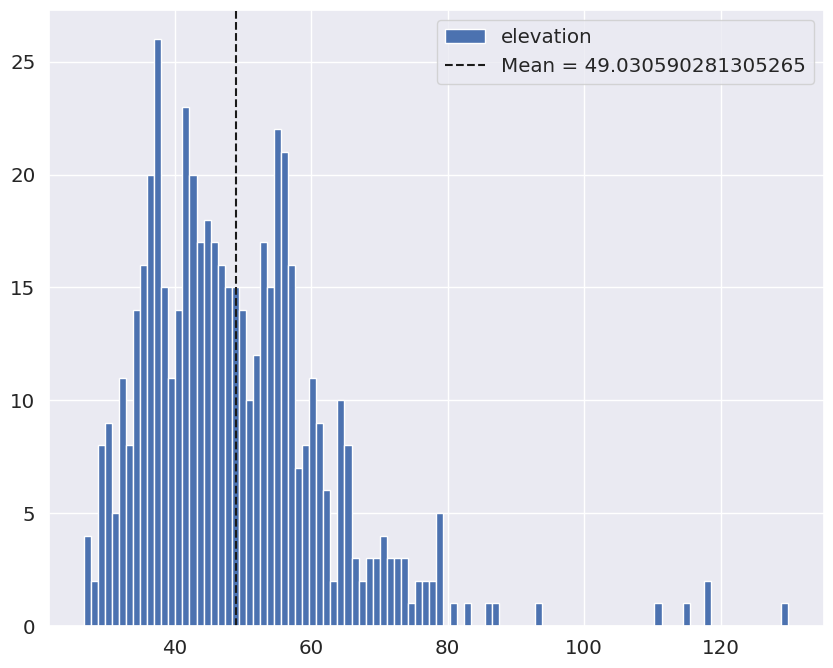

In [ ]:
plot_hist(data['elevation'], 'elevation')

In [ ]:
scaler = StandardScaler()
elev = np.asarray(data['elevation']).reshape(-1, 1)
norm['elevation'] = scaler.fit_transform(elev)

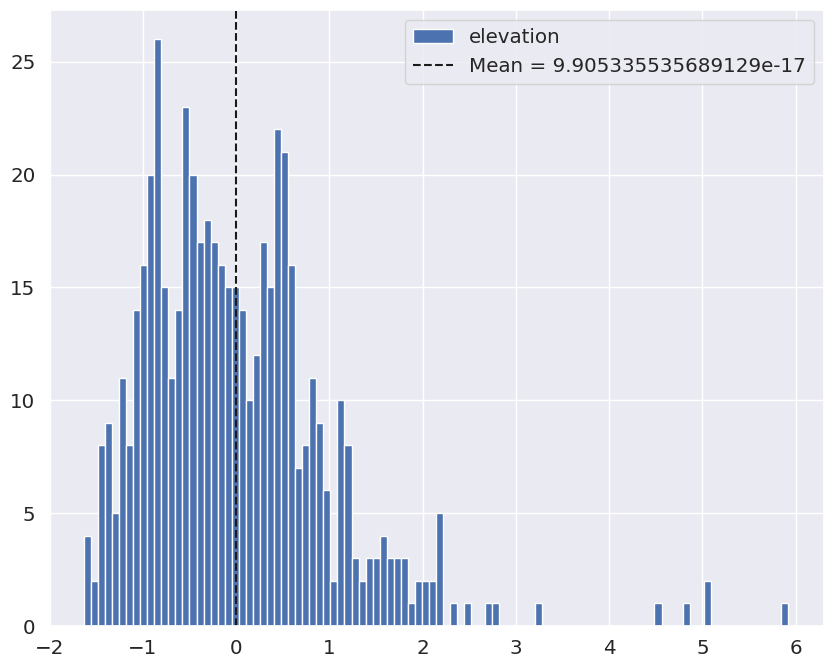

In [ ]:
plot_hist(norm['elevation'], 'elevation')

####Slope

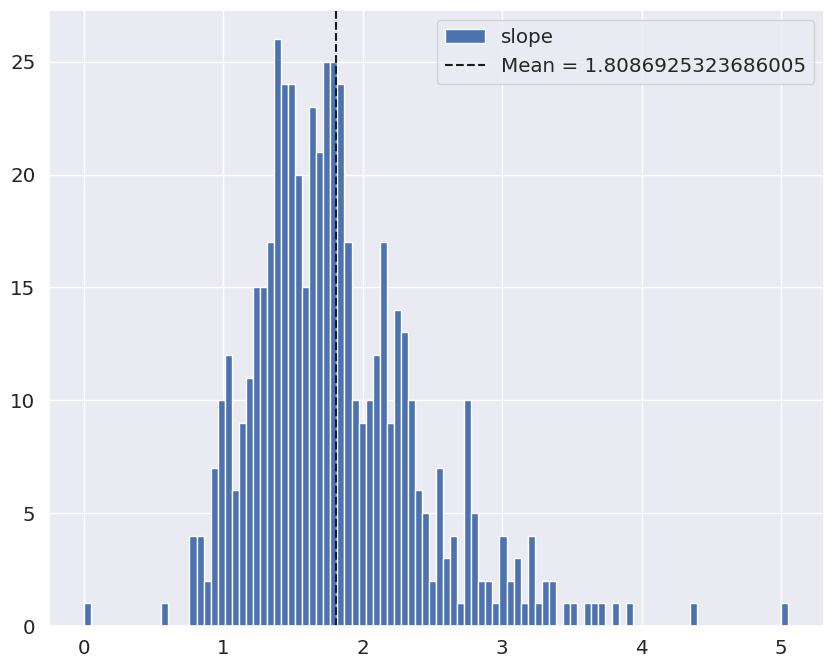

In [ ]:
plot_hist(data['slope'], 'slope')

In [ ]:
scaler = StandardScaler()
sl = np.asarray(data['slope']).reshape(-1, 1)
norm['slope'] = scaler.fit_transform(sl)

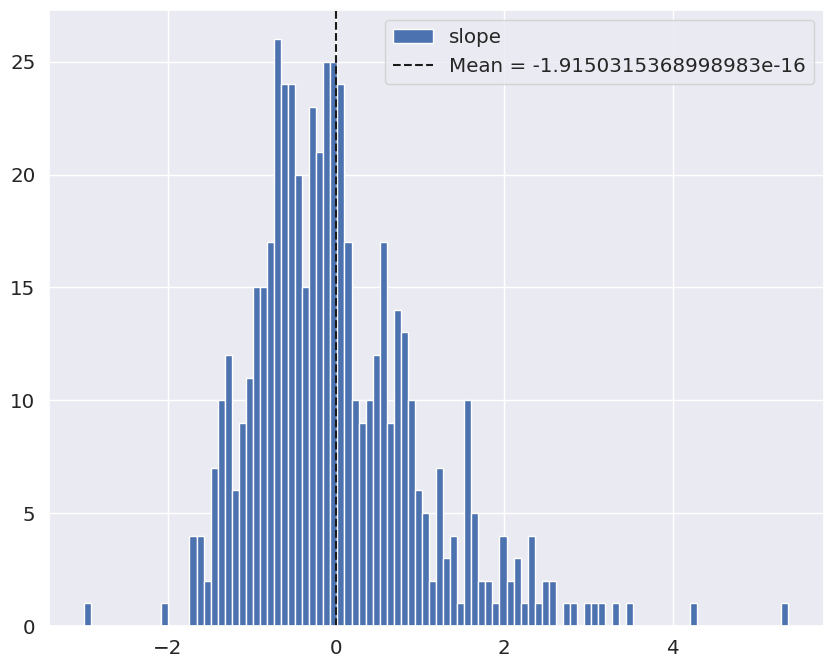

In [ ]:
plot_hist(norm['slope'], 'slope')

####Distance To Closest Crops

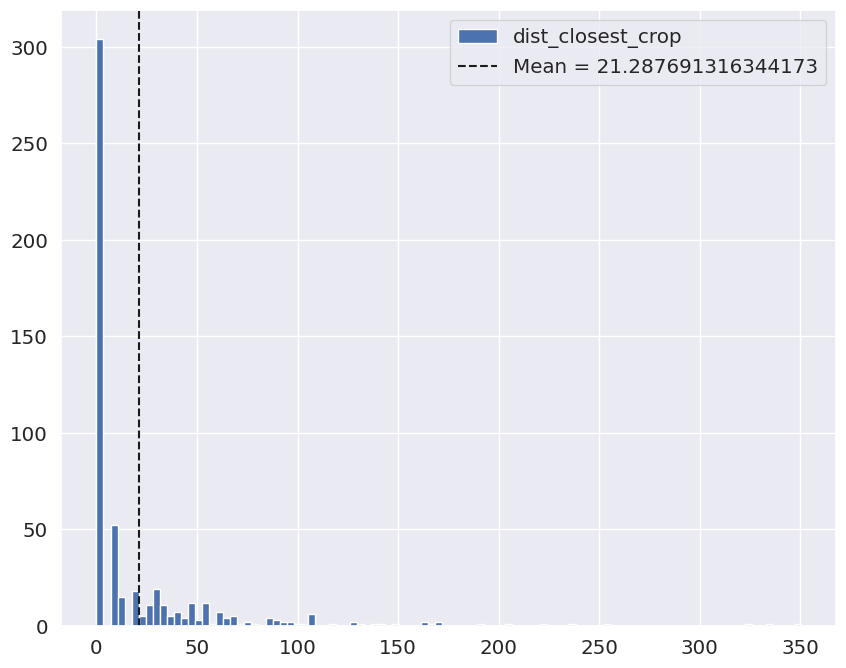

In [ ]:
plot_hist(data['dist_closest_crop'], 'dist_closest_crop')

In [ ]:
norm['dist_closest_crop'] = np.log(data['dist_closest_crop']+1)

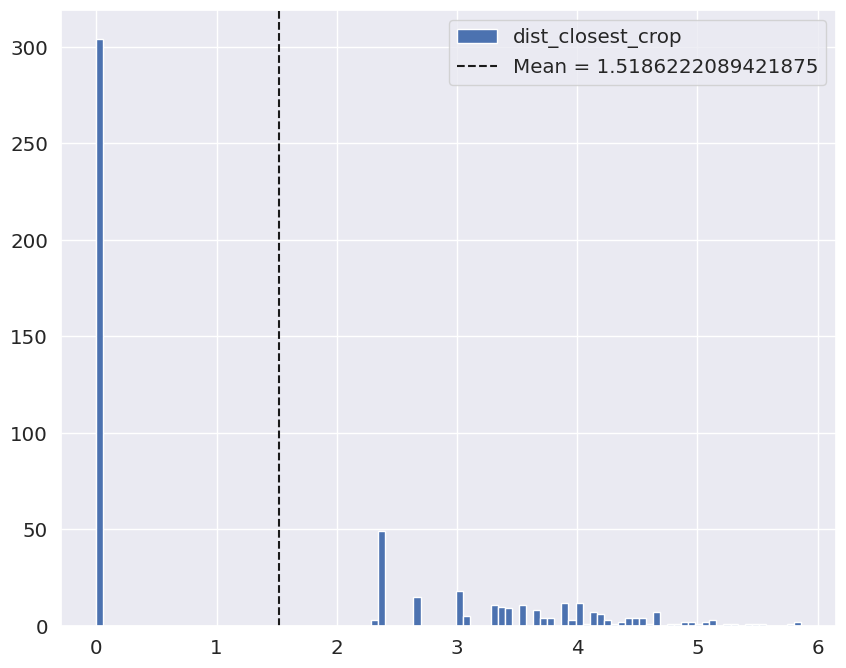

In [ ]:
plot_hist(norm['dist_closest_crop'], 'dist_closest_crop')

####Distance to Closest river

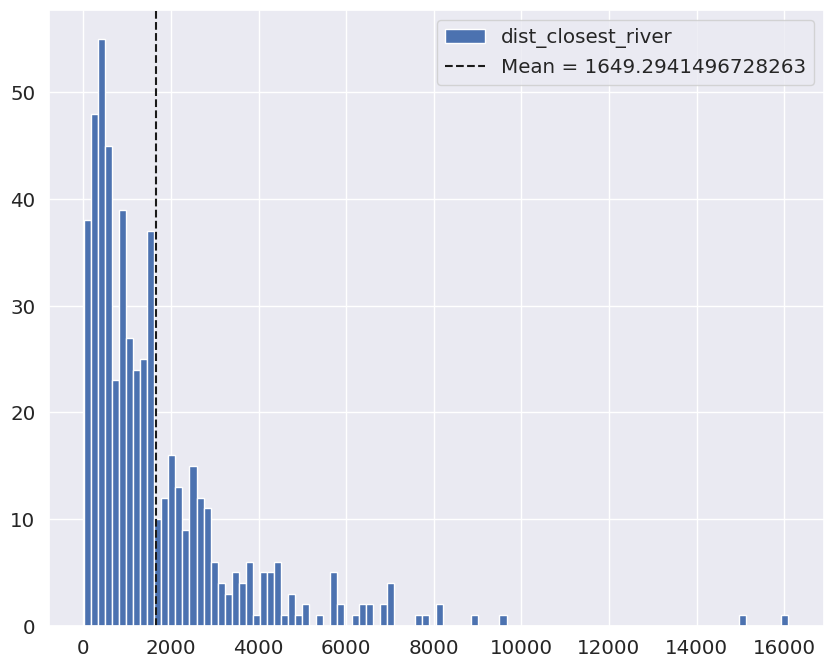

In [ ]:
plot_hist(data['dist_closest_river'], 'dist_closest_river')

In [ ]:
norm['dist_closest_river'] = np.log(data['dist_closest_river']+1)

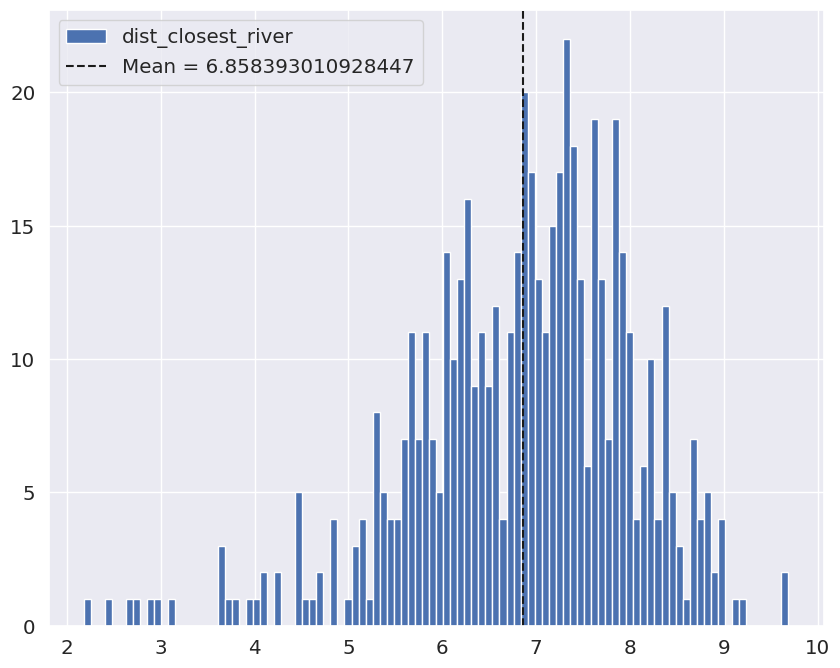

In [ ]:
plot_hist(norm['dist_closest_river'], 'dist_closest_river')

####Flow Accumulation

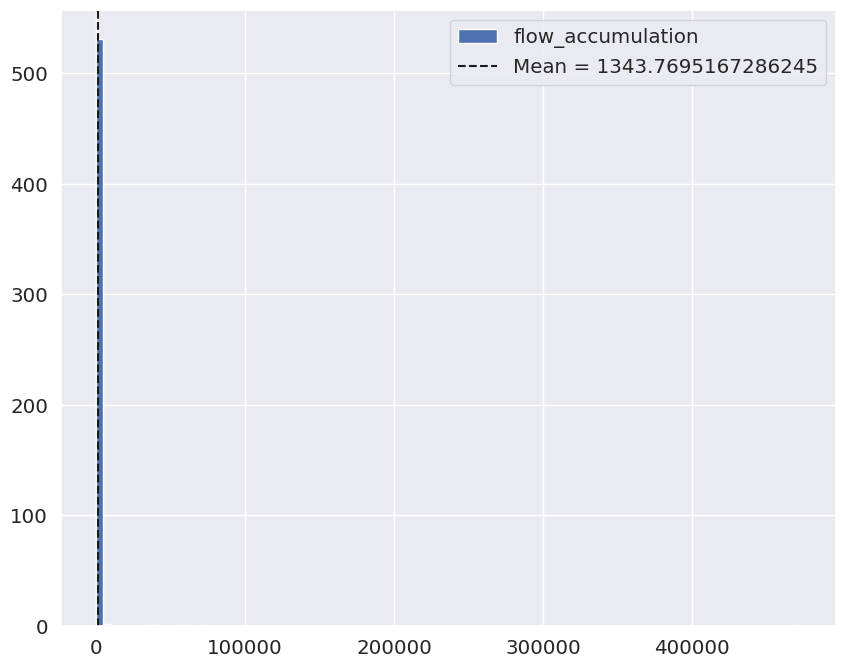

In [ ]:
plot_hist(data['flow_accumulation'], 'flow_accumulation')

In [ ]:
norm['flow_accumulation'] = np.log(data['flow_accumulation']+1)

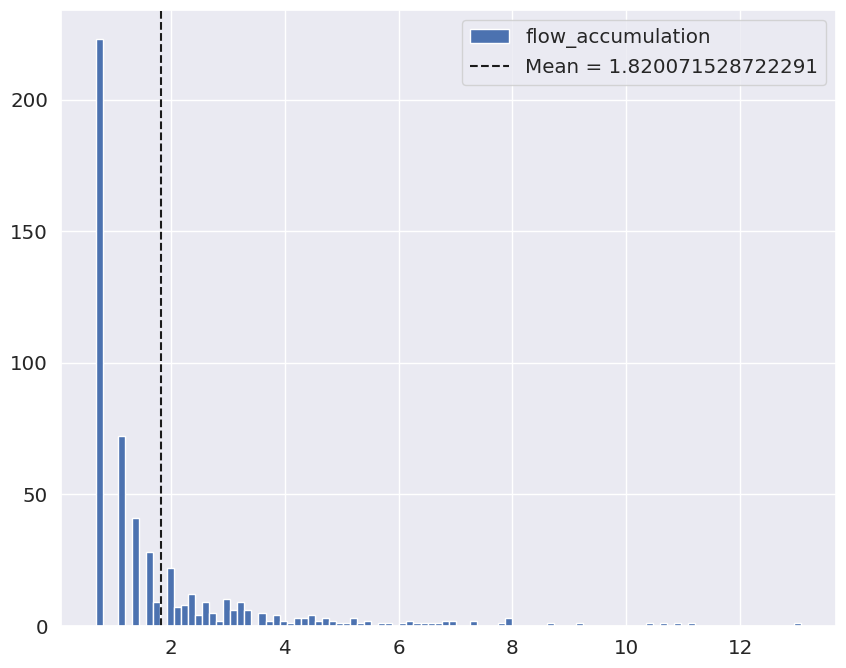

In [ ]:
plot_hist(norm['flow_accumulation'], 'flow_accumulation')

####Distance to Closest Lineament

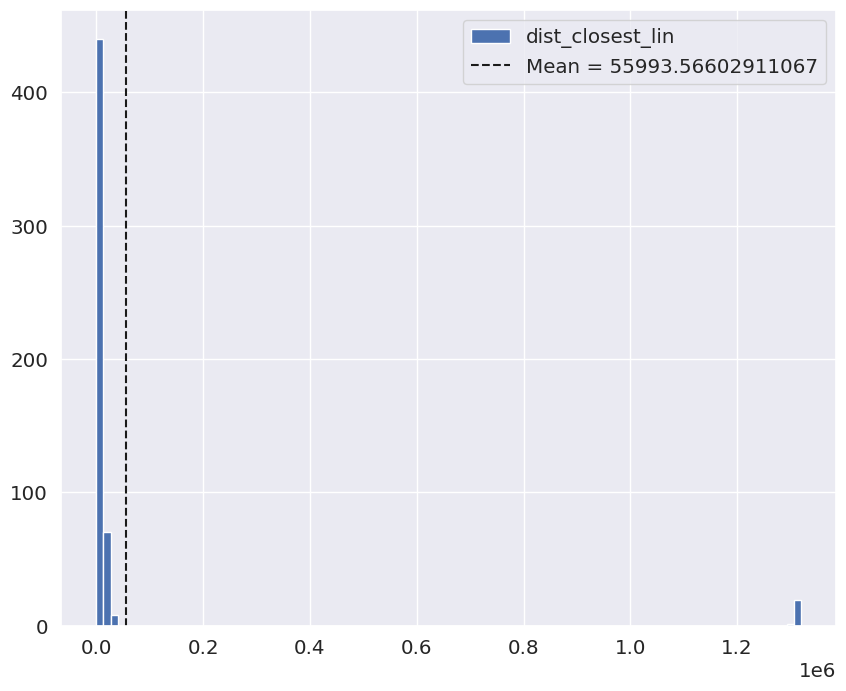

In [ ]:
plot_hist(data['dist_closest_lin'], 'dist_closest_lin')

In [ ]:
norm['dist_closest_lin'] = np.log(data['dist_closest_lin']+1)

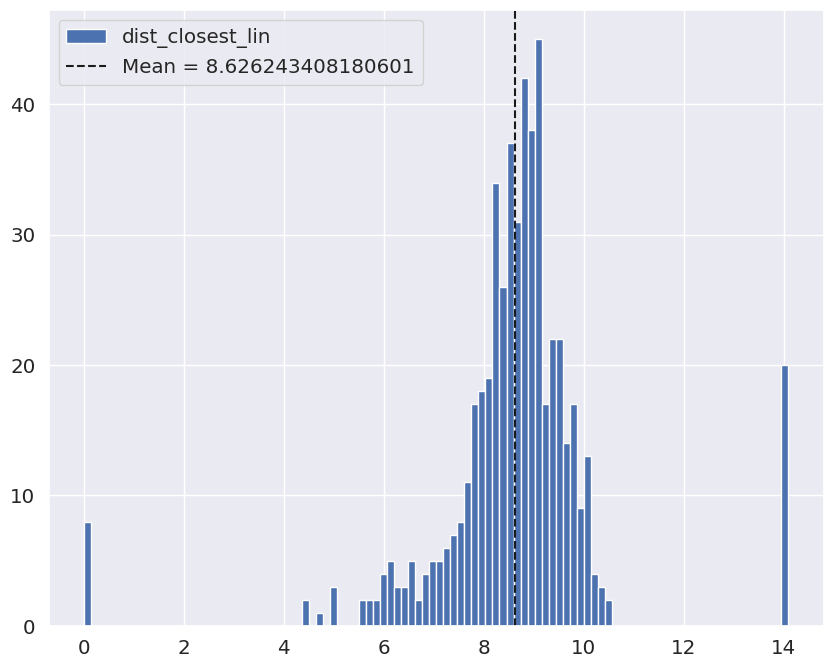

In [ ]:
plot_hist(norm['dist_closest_lin'], 'dist_closest_lin')

####Distance to Closest Road

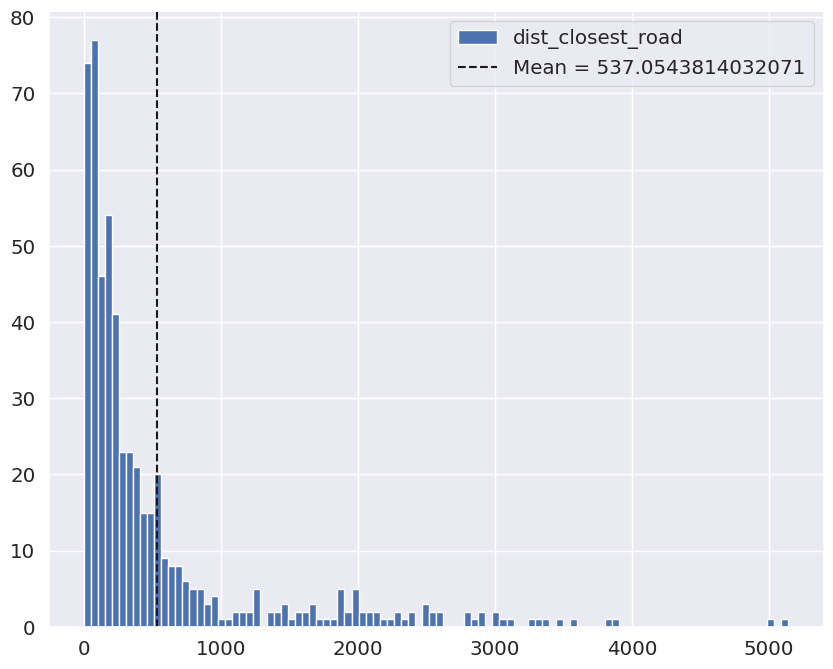

In [ ]:
plot_hist(data['dist_closest_road'], 'dist_closest_road')

In [ ]:
norm['dist_closest_road'] = np.log(data['dist_closest_road']+1)

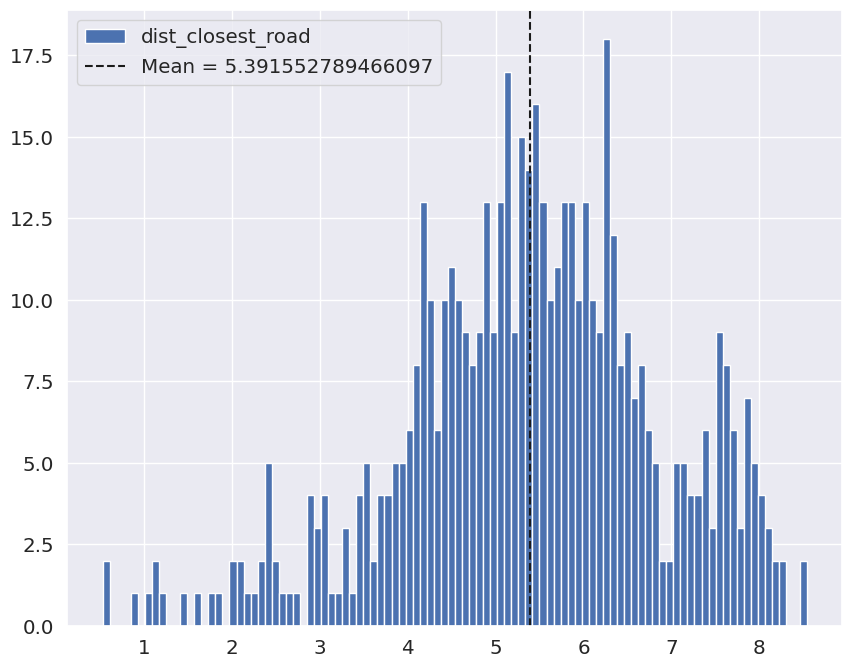

In [ ]:
plot_hist(norm['dist_closest_road'], 'dist_closest_road')

####Recent Cropping Intensity

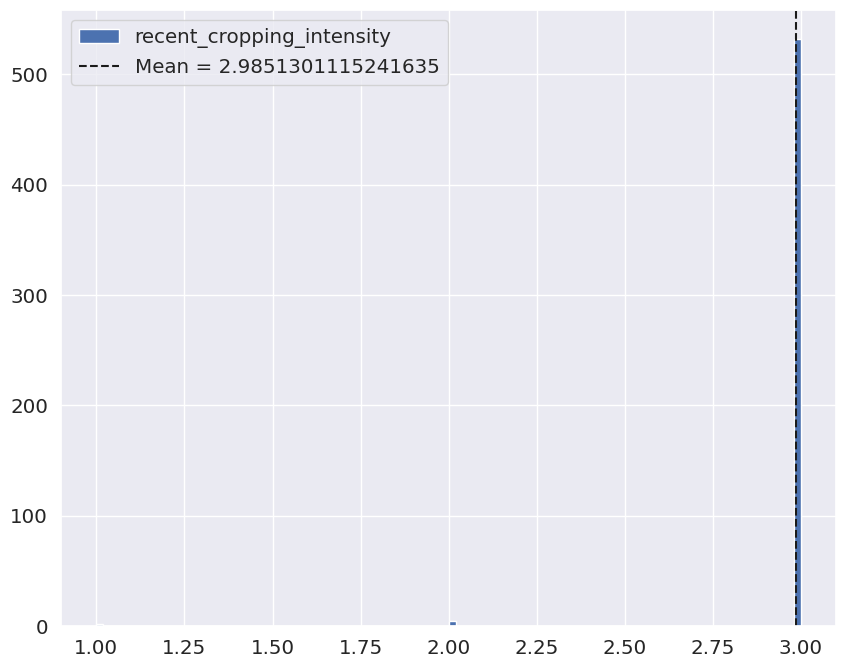

In [ ]:
plot_hist(data['recent_cropping_intensity'], 'recent_cropping_intensity')

####Distance to Closest upstream forest

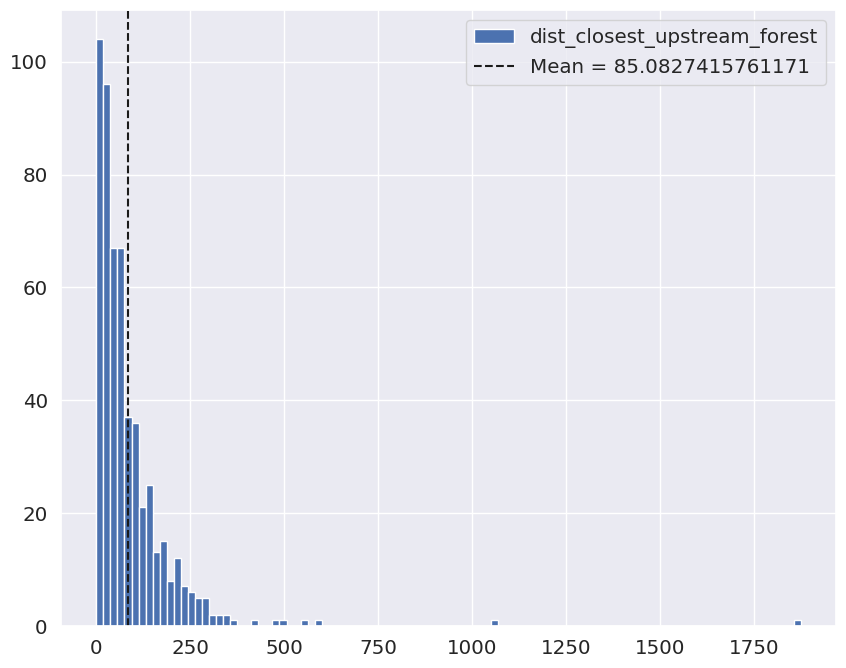

In [ ]:
plot_hist(data['dist_closest_upstream_forest'], 'dist_closest_upstream_forest')

In [ ]:
norm['dist_closest_upstream_forest'] = np.log(data['dist_closest_upstream_forest']+1)

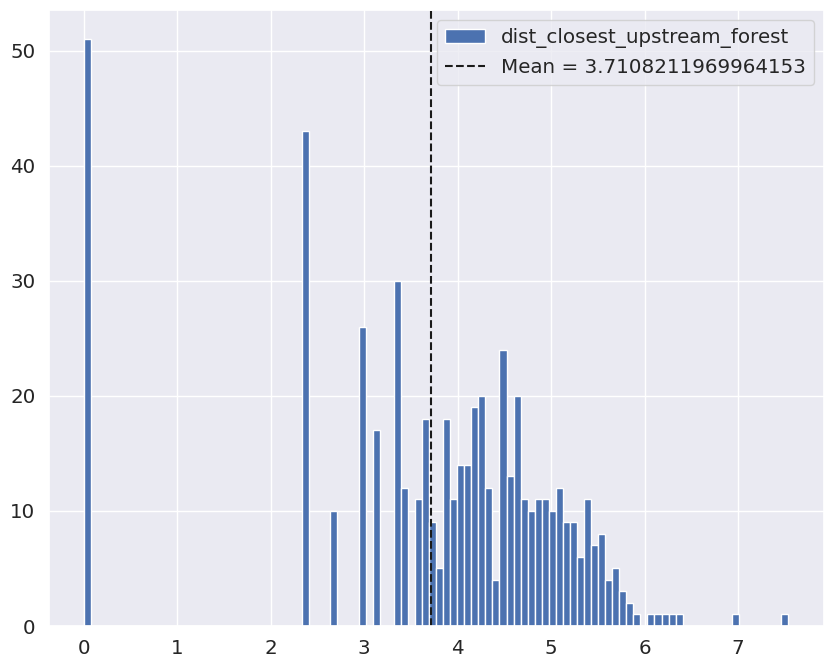

In [ ]:
plot_hist(norm['dist_closest_upstream_forest'], 'dist_closest_upstream_forest')

####Proximity to Water

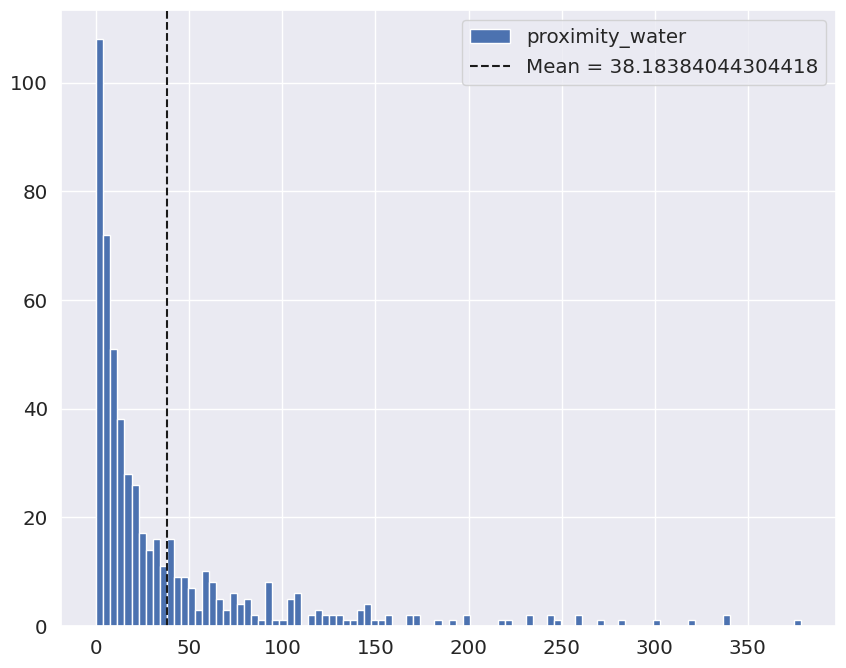

In [ ]:
plot_hist(data['proximity_water'], 'proximity_water')

In [ ]:
norm['proximity_water'] = np.log(data['proximity_water']+1)

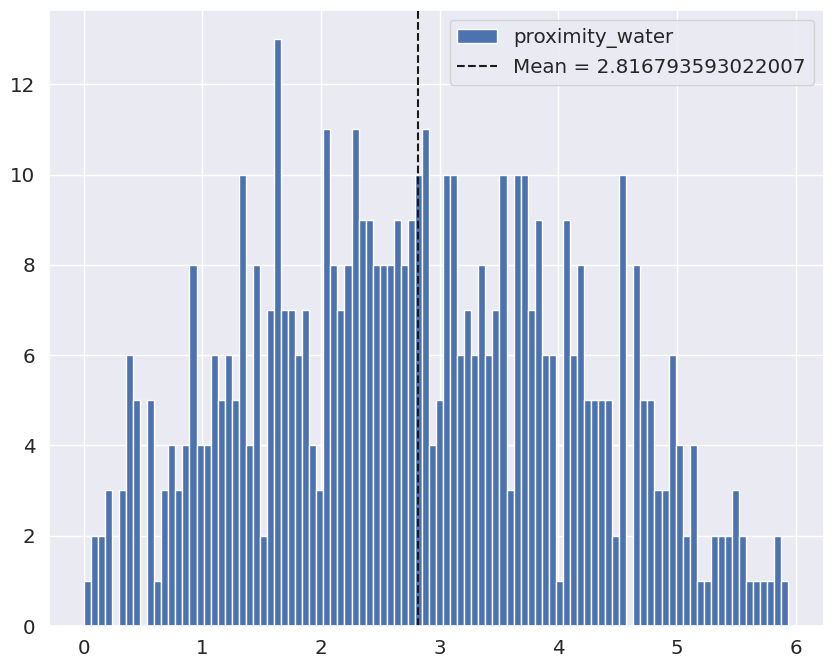

In [ ]:
plot_hist(norm['proximity_water'], 'proximity_water')

## Compute propensity scores

Dataset : data, Normalised dataset : norm

In [130]:
df = pd.read_csv("built.csv")

In [131]:
df

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0          12  00000000000000000016          1  25.103869  87.280995   
1        1          25  00000000000000000029          1  26.176702  86.241882   
2        2          26  0000000000000000002a          1  26.076810  86.079976   
3        3          27  0000000000000000002c          1  26.131438  86.059228   
4        4          45  00000000000000000040          1  25.936834  85.994986   
...    ...         ...                   ...        ...        ...        ...   
1711  1711        2062  00000000000000000bdf          0  27.209117  82.979404   
1712  1712        3391  0000000000000000138f          0  24.927845  86.431630   
1713  1713        3931  000000000000000016a4          0  27.349523  82.838189   
1714  1714        5365  00000000000000001ec4          0  27.144168  82.471407   
1715  1715        3763  000000000000000015a1          0  26.703275  83.679281   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.134451            0.848528          -1.469108   
1            -0.039732            0.418406          -0.816671   
2             0.423802           -0.161008          -0.530568   
3             0.401383           -0.222563          -1.394680   
4            -0.658939           -0.305348          -1.648261   
...                ...                 ...                ...   
1711         -0.595844           -1.149480           0.918168   
1712         -0.365539            1.572385           0.261462   
1713          0.183107            0.552749           1.330692   
1714         -0.034967           -0.053249          -1.186530   
1715          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  
0    -0.796380 -1.406058  0.159465  
1     0.304373 -0.309396  1.044892  
2     0.304373 -0.309396  1.044892  
3     0.304373 -0.309396  1.044892  
4     1.353328  1.504017 -0.850520  
...        ...       ...       ...  
1711  0.304373 -0.309396  1.044892  
1712  0.304373 -1.406058 -1.131092  
1713  0.304373 -0.309396  1.044892

In [132]:
df = df.dropna()
# norm = df.reset_index(drop=True)
norm = df
norm

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0          12  00000000000000000016          1  25.103869  87.280995   
1        1          25  00000000000000000029          1  26.176702  86.241882   
2        2          26  0000000000000000002a          1  26.076810  86.079976   
3        3          27  0000000000000000002c          1  26.131438  86.059228   
4        4          45  00000000000000000040          1  25.936834  85.994986   
...    ...         ...                   ...        ...        ...        ...   
1711  1711        2062  00000000000000000bdf          0  27.209117  82.979404   
1712  1712        3391  0000000000000000138f          0  24.927845  86.431630   
1713  1713        3931  000000000000000016a4          0  27.349523  82.838189   
1714  1714        5365  00000000000000001ec4          0  27.144168  82.471407   
1715  1715        3763  000000000000000015a1          0  26.703275  83.679281   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.134451            0.848528          -1.469108   
1            -0.039732            0.418406          -0.816671   
2             0.423802           -0.161008          -0.530568   
3             0.401383           -0.222563          -1.394680   
4            -0.658939           -0.305348          -1.648261   
...                ...                 ...                ...   
1711         -0.595844           -1.149480           0.918168   
1712         -0.365539            1.572385           0.261462   
1713          0.183107            0.552749           1.330692   
1714         -0.034967           -0.053249          -1.186530   
1715          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  
0    -0.796380 -1.406058  0.159465  
1     0.304373 -0.309396  1.044892  
2     0.304373 -0.309396  1.044892  
3     0.304373 -0.309396  1.044892  
4     1.353328  1.504017 -0.850520  
...        ...       ...       ...  
1711  0.304373 -0.309396  1.044892  
1712  0.304373 -1.406058 -1.131092  
1713  0.304373 -0.309396  1.044892

In [41]:
metadata

['Asset Name',
 'Asset ID',
 'Block',
 'District',
 'Panchayat',
 'Total_Expenditure',
 'block_coords',
 'district_coords',
 'state_coords']

In [ ]:
# psm.knn_matched(matcher='propensity_score', replacement=False, caliper=None)
# matching = psm.matched_ids
# fields = ['id', 'lon', 'lat']+metadata+confounding_vars
# all_fields = fields + [a+'_matched' for a in fields]
# asset_cvts = pd.merge(matching, norm,  how='inner', left_on=['id'], right_on = ['id'])
# asset_cfs_cvts= pd.merge(asset_cvts, norm,  how='inner', left_on=['matched_ID'], right_on = ['id'])
# asset_cfs_cvts = asset_cfs_cvts.drop(columns=['Treatment_x','Treatment_y','matched_ID'])
# asset_cfs_cvts.columns = all_fields
# matchings_df = asset_cfs_cvts
# matchings_df = matchings_df.drop(columns=['Asset ID_matched'])
# matchings_df.to_csv('./AES_data_regcode13/AES13_second_run/matchingsNormalisedData.csv')


In [133]:
psm = PsmPy(norm, treatment='Treatment', indx='idx', exclude = ['lon','lat', 'system:index', 'Unnamed: 0'])
psm.logistic_ps(balance = True)


In [134]:
p_scores = psm.predicted_data.copy()
p_scores.set_index('idx',inplace=True)
p_scores.sort_index(inplace=True)
p_scores = p_scores[['propensity_score','propensity_logit']]
p_scores

propensity_score  propensity_logit
idx                                     
0             0.678963          0.749010
1             0.682893          0.767098
2             0.460038         -0.160189
3             0.757417          1.138570
4             0.535033          0.140363
...                ...               ...
1711          0.162659         -1.638573
1712          0.581357          0.328348
1713          0.213679         -1.302888
1714          0.747078          1.083090
1715          0.465511         -0.138174

[1601 rows x 2 columns]

In [135]:
dataset_psm = norm.join(p_scores)
dataset_psm

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0          12  00000000000000000016          1  25.103869  87.280995   
1        1          25  00000000000000000029          1  26.176702  86.241882   
2        2          26  0000000000000000002a          1  26.076810  86.079976   
3        3          27  0000000000000000002c          1  26.131438  86.059228   
4        4          45  00000000000000000040          1  25.936834  85.994986   
...    ...         ...                   ...        ...        ...        ...   
1711  1711        2062  00000000000000000bdf          0  27.209117  82.979404   
1712  1712        3391  0000000000000000138f          0  24.927845  86.431630   
1713  1713        3931  000000000000000016a4          0  27.349523  82.838189   
1714  1714        5365  00000000000000001ec4          0  27.144168  82.471407   
1715  1715        3763  000000000000000015a1          0  26.703275  83.679281   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.134451            0.848528          -1.469108   
1            -0.039732            0.418406          -0.816671   
2             0.423802           -0.161008          -0.530568   
3             0.401383           -0.222563          -1.394680   
4            -0.658939           -0.305348          -1.648261   
...                ...                 ...                ...   
1711         -0.595844           -1.149480           0.918168   
1712         -0.365539            1.572385           0.261462   
1713          0.183107            0.552749           1.330692   
1714         -0.034967           -0.053249          -1.186530   
1715          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  propensity_score  propensity_logit  
0    -0.796380 -1.406058  0.159465          0.678963          0.749010  
1     0.304373 -0.309396  1.044892          0.682893          0.767098  
2     0.304373 -0.309396  1.044892          0.460038         -0.160189  
3     0.304373 -0.309396  1.044892          0.757417          1.138570  
4 

## Matching on block level

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [137]:
def get_matching_pairs(treated_df, non_treated_df, scaler=True):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values

    # if scaler == True:
    #     scaler = StandardScaler()

    # if scaler:
    #     scaler.fit(treated_x)
    #     treated_x = scaler.transform(treated_x)
    #     non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

In [ ]:
# distances, indices = get_matching_pairs(treated_df, non_treated_df)

In [138]:
dataset_psm

idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0          12  00000000000000000016          1  25.103869  87.280995   
1        1          25  00000000000000000029          1  26.176702  86.241882   
2        2          26  0000000000000000002a          1  26.076810  86.079976   
3        3          27  0000000000000000002c          1  26.131438  86.059228   
4        4          45  00000000000000000040          1  25.936834  85.994986   
...    ...         ...                   ...        ...        ...        ...   
1711  1711        2062  00000000000000000bdf          0  27.209117  82.979404   
1712  1712        3391  0000000000000000138f          0  24.927845  86.431630   
1713  1713        3931  000000000000000016a4          0  27.349523  82.838189   
1714  1714        5365  00000000000000001ec4          0  27.144168  82.471407   
1715  1715        3763  000000000000000015a1          0  26.703275  83.679281   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.134451            0.848528          -1.469108   
1            -0.039732            0.418406          -0.816671   
2             0.423802           -0.161008          -0.530568   
3             0.401383           -0.222563          -1.394680   
4            -0.658939           -0.305348          -1.648261   
...                ...                 ...                ...   
1711         -0.595844           -1.149480           0.918168   
1712         -0.365539            1.572385           0.261462   
1713          0.183107            0.552749           1.330692   
1714         -0.034967           -0.053249          -1.186530   
1715          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  propensity_score  propensity_logit  
0    -0.796380 -1.406058  0.159465          0.678963          0.749010  
1     0.304373 -0.309396  1.044892          0.682893          0.767098  
2     0.304373 -0.309396  1.044892          0.460038         -0.160189  
3     0.304373 -0.309396  1.044892          0.757417          1.138570  
4 

In [139]:
df = dataset_psm.copy()
df.reset_index(inplace=True)


In [140]:
all_matchings = pd.DataFrame()
# for block in df['block_coords'].unique():
treated_df = df[(df['Treatment']==1)][['idx','propensity_logit']].set_index('idx')
non_treated_df = df[(df['Treatment']==0)][['idx','propensity_logit']].set_index('idx')
if len(treated_df)>0 and len(non_treated_df)>0:
  matched_df = get_matching_pairs(treated_df, non_treated_df)
  matching = pd.DataFrame({'idx': treated_df.index, 'matched_ID': matched_df.index})
  all_matchings = pd.concat([all_matchings, matching], axis=0)

# pd.concat([aoi_assets, data], axis=0)

In [141]:
treated_df
# matched_df
# matching
# all_matchings

propensity_logit
idx                  
0            0.749010
1            0.767098
2           -0.160189
3            1.138570
4            0.140363
..                ...
423          0.067908
424         -0.227445
425         -1.276554
426          0.099201
428          0.682382

[415 rows x 1 columns]

In [142]:
non_treated_df

propensity_logit
idx                   
429           1.197656
430          -0.658845
431           0.487079
432          -0.223838
433           0.333297
...                ...
1711         -1.638573
1712          0.328348
1713         -1.302888
1714          1.083090
1715         -0.138174

[1186 rows x 1 columns]

In [143]:
all_matchings


idx  matched_ID
0      0        1542
1      1         619
2      2         724
3      3         737
4      4        1286
..   ...         ...
410  423        1338
411  424        1696
412  425         494
413  426        1563
414  428         789

[415 rows x 2 columns]

In [144]:
# matched_df
matching

idx  matched_ID
0      0        1542
1      1         619
2      2         724
3      3         737
4      4        1286
..   ...         ...
410  423        1338
411  424        1696
412  425         494
413  426        1563
414  428         789

[415 rows x 2 columns]

In [145]:
norm


idx  Unnamed: 0          system:index  Treatment        lat        lon  \
0        0          12  00000000000000000016          1  25.103869  87.280995   
1        1          25  00000000000000000029          1  26.176702  86.241882   
2        2          26  0000000000000000002a          1  26.076810  86.079976   
3        3          27  0000000000000000002c          1  26.131438  86.059228   
4        4          45  00000000000000000040          1  25.936834  85.994986   
...    ...         ...                   ...        ...        ...        ...   
1711  1711        2062  00000000000000000bdf          0  27.209117  82.979404   
1712  1712        3391  0000000000000000138f          0  24.927845  86.431630   
1713  1713        3931  000000000000000016a4          0  27.349523  82.838189   
1714  1714        5365  00000000000000001ec4          0  27.144168  82.471407   
1715  1715        3763  000000000000000015a1          0  26.703275  83.679281   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.134451            0.848528          -1.469108   
1            -0.039732            0.418406          -0.816671   
2             0.423802           -0.161008          -0.530568   
3             0.401383           -0.222563          -1.394680   
4            -0.658939           -0.305348          -1.648261   
...                ...                 ...                ...   
1711         -0.595844           -1.149480           0.918168   
1712         -0.365539            1.572385           0.261462   
1713          0.183107            0.552749           1.330692   
1714         -0.034967           -0.053249          -1.186530   
1715          0.019697            0.238037          -0.092575   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         1.729130  -0.774775  0.734745          -0.957141   
1                        -1.937200  -0.602096  0.993236           0.423464   
2                        -0.627839  -0.790297 -0.337730           0.860320   
3                        -1.937200  -0.644777  1.191541           0.423464   
4                        -0.461273  -0.749904  0.663905           1.437364   
...                            ...        ...       ...                ...   
1711                      0.642957  -0.074349 -0.380570          -0.957141   
1712                     -0.348796   0.468572 -0.096074           1.470871   
1713                     -1.937200  -0.021492 -0.394567          -0.957141   
1714                     -0.433290   0.154901  0.721838           1.686883   
1715                     -1.026581  -0.094200 -0.128658          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.812527          0.455174                           2.0  13.0   
1            1.205923          0.681376                           2.0   3.0   
2           -0.055328         -0.018411                           1.0  13.0   
3            0.633173          0.360123                           2.0   3.0   
4            1.368170          0.630604                           3.0  13.0   
...               ...               ...                           ...   ...   
1711         0.948516          0.293228                           2.0  13.0   
1712        -1.395916          2.219131                           1.0  13.0   
1713        -0.750310          0.083689                           2.0  13.0   
1714        -1.469211         -0.924229                           2.0   3.0   
1715        -1.220582          0.315841                           2.0  13.0   

           CEC        PH        OC  
0    -0.796380 -1.406058  0.159465  
1     0.304373 -0.309396  1.044892  
2     0.304373 -0.309396  1.044892  
3     0.304373 -0.309396  1.044892  
4     1.353328  1.504017 -0.850520  
...        ...       ...       ...  
1711  0.304373 -0.309396  1.044892  
1712  0.304373 -1.406058 -1.131092  
1713  0.304373 -0.309396  1.044892

In [146]:
confounding_vars = ['elevation',
                    'slope',
                    'drainage_density',
                    'dist_closest_crop',
                    'dist_closest_river',
                    'flow_accumulation',
                    'dist_closest_lin',
                    'dist_closest_road',
                    'recent_cropping_intensity',
                    'dist_closest_upstream_forest',
                    'proximity_water',
                    'HSG',
                    'CEC',
                    'PH',
                    'OC',
                    'cropping_intensity_2016-2017'
                    ]
metadata


['Asset Name',
 'Asset ID',
 'Block',
 'District',
 'Panchayat',
 'Total_Expenditure',
 'block_coords',
 'district_coords',
 'state_coords']

In [147]:
matching = all_matchings
fields = ['idx', 'Unnamed: 0', 'system:index',  'lat', 'lon', 'dist_closest_lin', 'dist_closest_river', 'dist_closest_road', 'dist_closest_upstream_forest', 'elevation',
 'slope', 'flow_accumulation', 'proximity_water',  'drainage_density', 'cropping_intensity_2016-2017',  'HSG',
 'CEC',
 'PH',
 'OC']
# print(len(fields))
all_fields = fields + [a+'_matched' for a in fields]
asset_cvts = pd.merge(matching, norm,  how='inner', left_on=['idx'], right_on = ['idx'])
asset_cfs_cvts= pd.merge(asset_cvts, norm,  how='inner', left_on=['matched_ID'], right_on = ['idx'])
asset_cfs_cvts = asset_cfs_cvts.drop(columns=['Treatment_x','Treatment_y','matched_ID'])
asset_cfs_cvts.columns = all_fields
# asset_cfs_cvts = asset_cfs_cvts.drop(columns=[c+'_matched' for c in metadata])
matchings_df = asset_cfs_cvts
matchings_df.to_csv("built_mod.csv", index=False)


In [128]:
# matchings_df

idx  Unnamed: 0          system:index        lat        lon  \
0        0           0  00000000000000000001  25.248979  87.479772   
1      303        1060  00000000000000000603  26.138025  87.572739   
2        1           5  0000000000000000000b  25.244421  87.337953   
3        2           9  00000000000000000011  25.112998  86.972778   
4        3          12  00000000000000000016  25.103868  87.280996   
...    ...         ...                   ...        ...        ...   
1037  1062        1985  00000000000000000b76  27.030530  82.834468   
1038  1063        1986  00000000000000000b77  27.050249  82.811103   
1039  1064        1987  00000000000000000b79  27.052379  82.843256   
1040  1065        1988  00000000000000000b7a  27.050112  82.847424   
1041  1066        1989  00000000000000000b7c  27.046126  82.826069   

      dist_closest_lin  dist_closest_river  dist_closest_road  \
0            -0.700182            0.928141          -1.906862   
1            -0.368883           -1.872404          -1.217261   
2             0.188764            1.293040          -0.979734   
3            -0.467814            0.426324          -1.141298   
4            -0.134451            0.848528          -1.469108   
...                ...                 ...                ...   
1037          0.104991           -0.314145           0.956350   
1038          0.181055           -0.408753           0.110072   
1039          0.092508           -0.656051           0.711785   
1040          0.074468           -0.591762           0.944650   
1041          0.143671           -0.423742           0.130506   

      dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                         0.306115  -0.619567  0.350436          -0.957141   
1                        -0.062267  -0.694353  0.443947           1.023651   
2                         0.820163  -0.752937 -0.457296          -0.957141   
3                        -0.141779  -0.825142 -0.704246          -0.957141   
4                         1.729130  -0.774775  0.734745          -0.957141   
...                            ...        ...       ...                ...   
1037                      0.942272  -0.041112 -0.192646          -0.957141   
1038                     -0.290084  -0.029816 -0.212678           1.548266   
1039                      0.178180  -0.029068 -0.047988          -0.957141   
1040                     -1.027245  -0.073612 -0.432058          -0.957141   
1041                      0.405153   0.005885  0.453432          -0.957141   

      proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0            0.000624          2.644864                           1.0   3.0   
1            0.448714          0.220019                           3.0   3.0   
2            0.429965          1.976942                           2.0   3.0   
3            0.157241          0.960050                           1.0  13.0   
4            0.812527          0.455174                           2.0  13.0   
...               ...               ...                           ...   ...   
1037        -1.013820         -0.220171                           2.0  13.0   
1038        -0.417439         -0.691581                           2.0  13.0   
1039        -0.779313         -0.008847                           2.0  13.0   
1040        -0.122670         -0.305285                           2.0  13.0   
1041        -0.103095          0.106045                           2.0   3.0   

           CEC        PH        OC  idx_matched  Unnamed: 0_matched  \
0     0.304373 -1.406058 -1.131092         3434                6040   
1    -1.839445 -0.093962 -1.131092         3434                6040   
2    -0.485743  1.504017 -1.018065         3337                8329   
3    -0.796380 -1.406058  0.159465         3537                5981   
4    -0.796380 -1.406058  0.159465         2057                4239   
...        ...       ...       ...          ...                 ...   
10

In [148]:
asset_cfs_cvts

idx  Unnamed: 0          system:index        lat        lon  \
0      0          12  00000000000000000016  25.103869  87.280995   
1    413        1673  000000000000000009a0  27.260946  83.156509   
2      1          25  00000000000000000029  26.176702  86.241882   
3    212        1015  000000000000000005c4  26.370321  87.447466   
4      2          26  0000000000000000002a  26.076810  86.079976   
..   ...         ...                   ...        ...        ...   
410  417        1785  00000000000000000a50  27.240956  82.698689   
411  419        1797  00000000000000000a62  27.492342  81.588096   
412  421        1831  00000000000000000a94  27.482247  81.398625   
413  422        1838  00000000000000000a9b  27.710401  81.488676   
414  423        1844  00000000000000000aa9  27.388093  81.670518   

     dist_closest_lin  dist_closest_river  dist_closest_road  \
0           -0.134451            0.848528          -1.469108   
1            0.342579           -1.170173          -1.869777   
2           -0.039732            0.418406          -0.816671   
3           -1.123686           -0.278114          -1.358968   
4            0.423802           -0.161008          -0.530568   
..                ...                 ...                ...   
410         -0.411372            0.226951           1.684909   
411          1.988671           -0.402259           0.776777   
412          1.988689           -2.200939          -0.574027   
413          1.988284           -1.749603          -0.401663   
414          1.988855            0.373397          -0.093065   

     dist_closest_upstream_forest  elevation     slope  flow_accumulation  \
0                        1.729130  -0.774775  0.734745          -0.957141   
1                       -0.134799  -0.026693  0.580038          -0.239721   
2                       -1.937200  -0.602096  0.993236           0.423464   
3                       -0.145182  -0.462037  0.805900           0.161817   
4                       -0.627839  -0.790297 -0.337730           0.860320   
..                            ...        ...       ...                ...   
410                     -0.498736   0.077821 -0.797535          -0.957141   
411                      0.700513   0.470353 -0.267580          -0.239721   
412                      0.839760   0.523637 -0.745286          -0.957141   
413                     -0.867755   0.591910 -0.664831           0.423464   
414                      0.343520   0.494837  1.301742          -0.957141   

     proximity_water  drainage_density  cropping_intensity_2016-2017   HSG  \
0           0.812527          0.455174                           2.0  13.0   
1           1.510714         -0.036548                           2.0   3.0   
2           1.205923          0.681376                           2.0   3.0   
3           0.718255          0.184790                           3.0   3.0   
4          -0.055328         -0.018411                           1.0  13.0   
..               ...               ...                           ...   ...   
410        -0.183993          0.027832                           2.0  13.0   
411         0.788615          0.159108                           2.0   3.0   
412         1.327301         -0.608495                           2.0   3.0   
413        -0.330655         -0.046754                           2.0  13.0   
414         1.011684         -0.925928                           2.0  13.0   

          CEC        PH        OC  idx_matched  Unnamed: 0_matched  \
0   -0.796380 -1.406058  0.159465         1542                3684   
1    0.304373 -0.309396  1.044892         1542                3684   
2    0.304373 -0.309396  1.044892          619                7288   
3   -1.839445 -0.093962 -1.131092          619                7288   
4    0.304373 -0.309396  1.044892          724                9036   
..        ...       ...       ...          ...                 ...   
410  0.304373 -0.309396  1.044892          924                2082 

In [ ]:
matchings_df = pd.read_csv("./AES_data_regcode13/"+folder_run+"/matchings_blockLevel.csv")

In [ ]:
matchings_df[matchings_df['block_coords']==matchings_df['block_coords_matched']]

id        lon        lat block_coords district_coords state_coords  \
0    1  87.090751  25.478205      Rupauli          purnia        bihar   
1   79  87.099664  25.562738      Rupauli          purnia        bihar   
2    3  86.330302  25.880028      Mahishi         saharsa        bihar   
3    4  85.733635  26.210828    Singhwara       darbhanga        bihar   
4    5  85.733665  26.211008    Singhwara       darbhanga        bihar   
..  ..        ...        ...          ...             ...          ...   
61  92  87.112762  26.321310   Narpatganj          araria        bihar   
62  93  87.558989  26.229278       Palasi          araria        bihar   
63  94  87.319228  26.048724     Raniganj          araria        bihar   
64  95  87.398128  26.015977     Raniganj          araria        bihar   
65  97  86.133477  25.740958     Hasanpur      samastipur        bihar   

                                           Asset Name      Asset ID  \
0                                                pond  5.001344e+09   
1                                                  IF  5.001962e+09   
2                              0519014013/WC/20231612  5.001227e+09   
3   RAMDEV SAHANI KE NIJI JAMIN ME POKHAR KA NIRMA...  5.000891e+09   
4   RAMDEV SAHANI KE NIJI JAMIN ME POKHAR KA NIRMA...  5.000891e+09   
..                                                ...           ...   
61   Ujjwal Kumar ke niji jamin me pokhar nirman kary  5.000958e+09   
62  WARD 09 ME ANISH S/O LATE ALIMUDDIN KE NIJI JA...  5.000979e+09   
63      iswanath Singh Ke Khet Mei Pokhar Nirman Work  5.001806e+09   
64          खालिद के निजी जमीन में पोखर निर्माण कार्य  5.001118e+09   
65                                          FARM POND  5.000985e+09   

          Block   District              Panchayat  Total_Expenditure  \
0    naugachhia  BHAGALPUR              dholbajja           330096.0   
1       rupouli     PURNIA                bhikhna             8496.0   
2   gaurabauram  DARBHANGA                mansara            70092.0   
3     singhwara  DARBHANGA                 katasa            75933.0   
4     singhwara  DARBHANGA                 katasa            72216.0   
..          ...        ...                    ...                ...   
61   narpatganj     ARARIA  madhura (s) panchayat                0.0   
62       palasi     ARARIA    chahatpur panchayat                0.0   
63     raniganj     ARARIA      basaiti panchayat                0.0   
64     raniganj     ARARIA    dhobaniya panchayat            79119.0   
65    chhaurahi  BEGUSARAI                 sahuri            72246.0   

    elevation     slope  dist_closest_crop  dist_closest_river  \
0   -0.941486 -0.256230           3.325643            7.973799   
1   -0.860554  0.121262           2.349271            6.891970   
2   -0.280361 -0.118873           0.000000            5.810452   
3    0.517609 -0.087786           0.000000            5.682081   
4    0.517609 -0.087786           0.000000            5.682081   
..        ...       ...                ...                 ...   
61   1.211937 -0.089768           3.997221            7.357296   
62   0.445119  0.740746           4.055443            6.432749   
63   0.064131  0.709392           3.380206            8.153874   
64  -0.138612  0.533835           3.380338            5.286186   
65  -0.391849 -0.287875           3.718003            6.418298   

    flow_accumulation  dist_closest_lin  dist_closest_road  \
0            1.386294          8.500365           1.073977   
1            0.693147          5.894136           4.880632   
2            0.693147          8.999502           3.291752   
3            0.693147          8.940295           4.145439   
4            0.693147          8.937824           4.145439   
..                ...               ...                ...   
61           0.693147          8.344360           7.008106   
62           1.609438          7.727284           4.044411   
63           3.367296          8.468114       

In [87]:
matchings_df

NameError: name 'matchings_df' is not defined

In [ ]:
# fig, ax = plt.subplots()
# # plt.scatter(range(0,len(non_treated_df)), non_treated_df['propensity_score'], alpha=0.3, label='All non-treated')
# plt.scatter(range(0,len(treated_df)), treated_df['propensity_score'], label='Treated')
# plt.scatter(range(0,len(matched_df)), matched_df['propensity_score'], marker='x', label='matched')
# plt.legend()
# # plt.xlim(30,40)